# Diffusion Results

The diffusion coefficient of the drug is highly related to the stability of the amorphous solid dispersion. Typically, a higher diffusion coefficient of the drug implies a higher molecular mobility, promoting them to rearrange into ordered or amorphous domains within the polymer matrix. This has an effect of reducing the solubility of the drug formulation

We use a naproxen/PVP amorphous solid dispersion as our test. We consider a hydrated formulation and a dry one too - mimicking suboptimal storage conditions and perfect storage conditions respecitvely. The first step is obtaining the mean square displacement (MSD) curves given by the relation:

\begin{equation}
\text{MSD}(\textbf{r}) = \Big\langle\frac{1}{N}\sum_{i=1}^{N}|\mathbf{r}_i(t_0+\tau)-\mathbf{r}_i(t_0)|^2\Big\rangle_{t_0}.
\end{equation}

The diffusion coefficient is then related to the MSD via the Einstein formula:

\begin{equation}
D = \frac{1}{6}\frac{d}{dt}\text{MSD}(\mathbf{r}).
\end{equation}

In the summer project we successfully computed the diffusion coefficient of naproxen, $D_{\text{nap}}$, for a range of temperatures ranging from $600$ K to $300$ K. Unfortunately, we ran out of time to check convergence. In particular, we need to be concerned with the convergence of $D_{\text{nap}}$ at $300$ K as this temperature is most relevant to the human body.

### MSD Curves at 300 K - Dry Config 1

To assess convergence at $300$ K we use the following procedure. Extend the simulation at $300$ K. Then extract increasing trajectories from this increased time period - that is $1$ ns, $2$ ns and so on until the entire extension is covered. On each of these trajectories, we then compute the MSD curve.

In [1]:
import diffusion

# Organise the trajectories so there is a logical order to plotting
ordered_trajs = diffusion.traj_organiser_300k(
    "/storage/chem/phuqdw/breaking-bad/diffusion", is_dry=True
)

# Compute the MSD curves at 300 K
msd_300k, lagtimes_300k = diffusion.msd_calculator(
    topology_file="dry_cooling_ramp.tpr",
    sorted_trajectory_array=ordered_trajs,
    api_residue_name="NAP",
    msd_cache_file_name="dry_config1.npz",
)

/storage/chem/phuqdw/breaking-bad/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading cached MSD data from dry_config1.npz


These MSD curves are then inspected to find the linear region. Now due to the way that MSDs are calculated with moving time origins, there is a cut off to where we can end the fitting region. In particular, it is half off the length of the trajectory used, sometimes called lagtime.

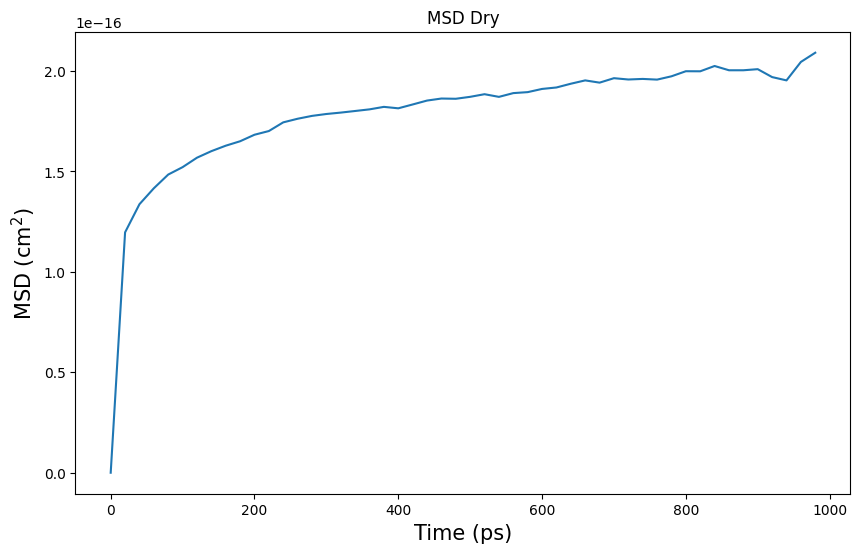

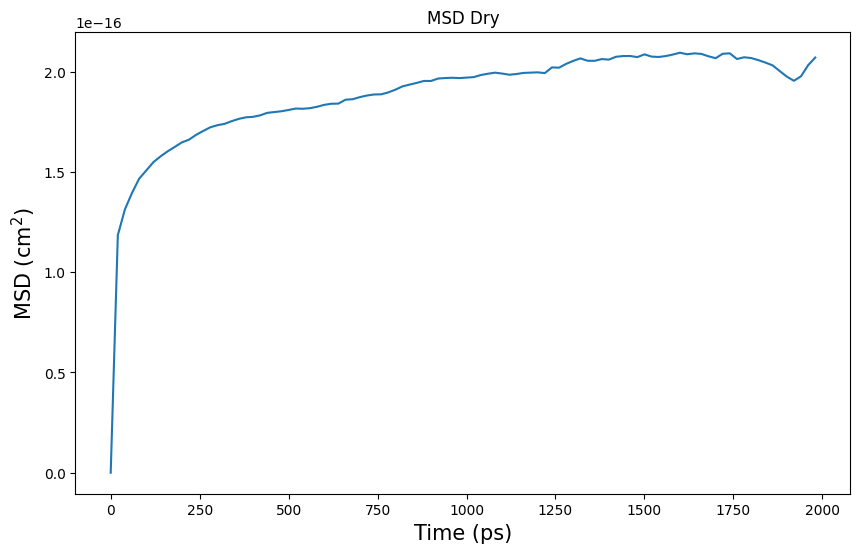

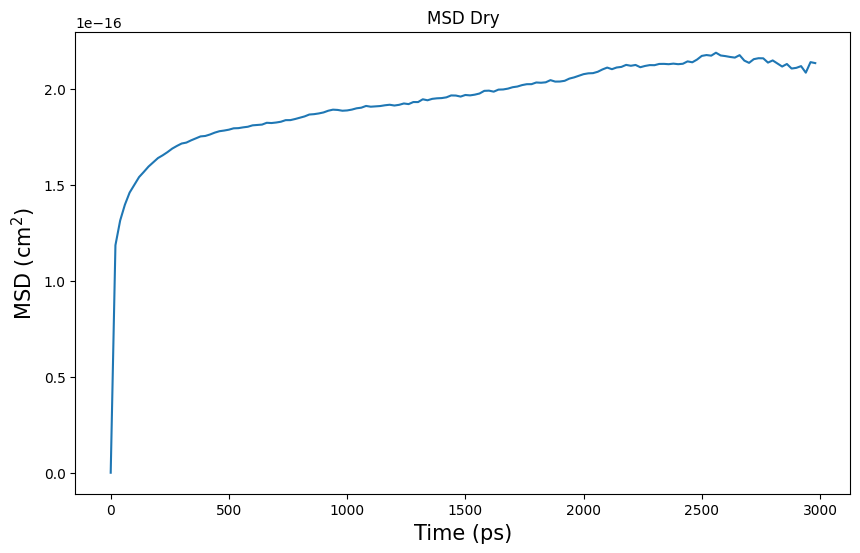

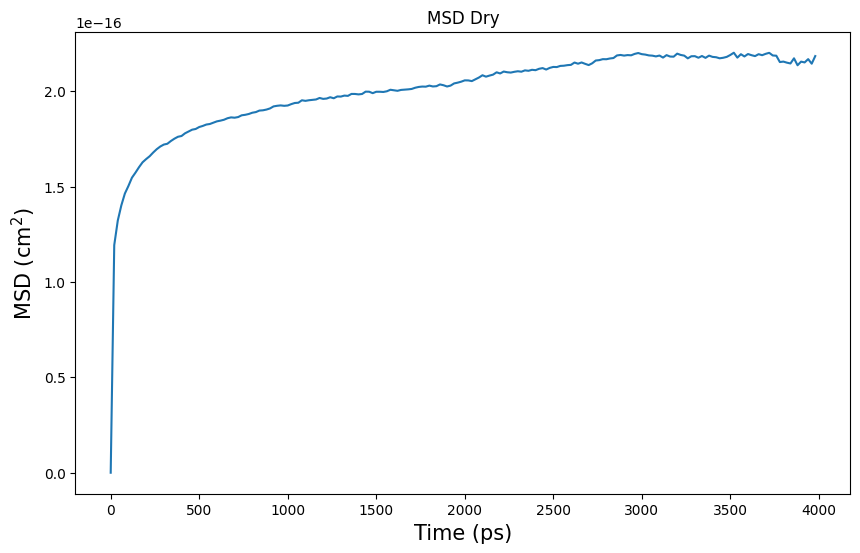

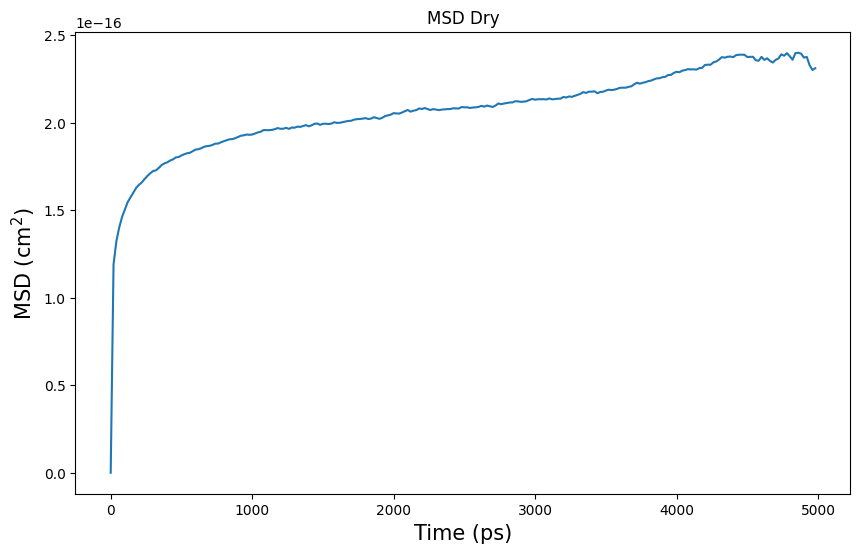

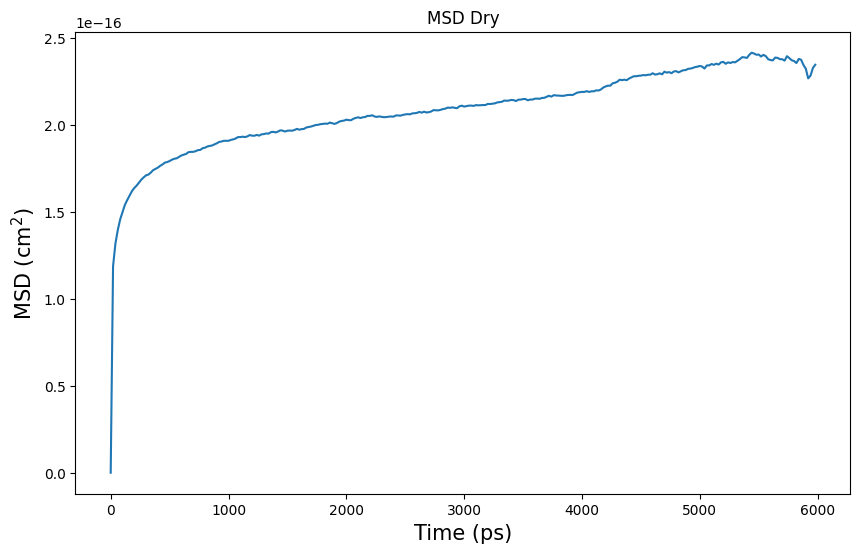

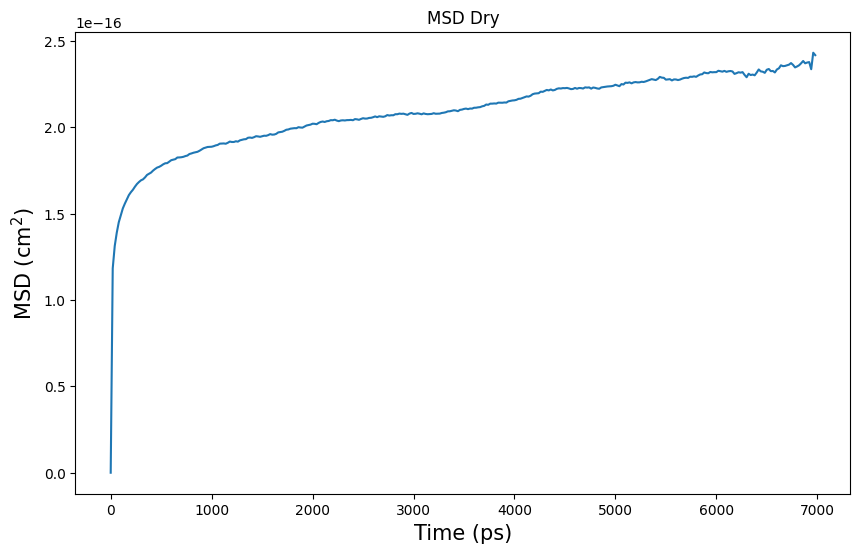

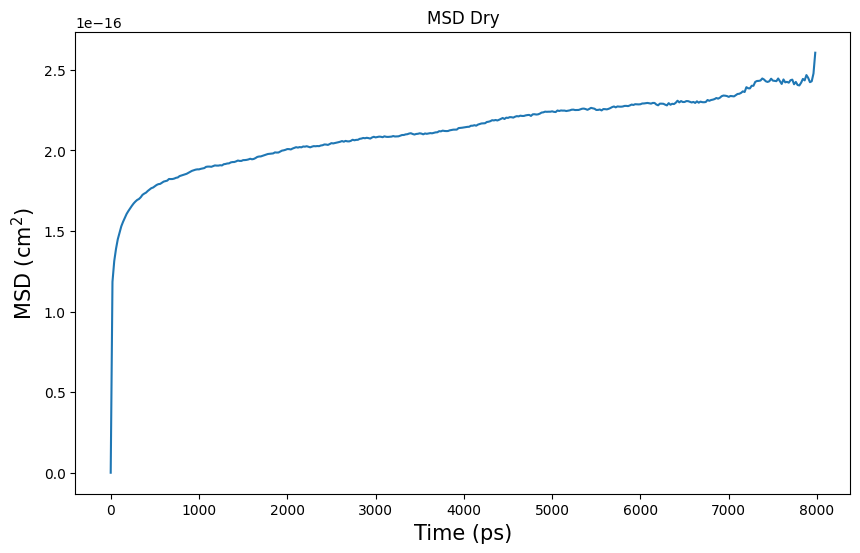

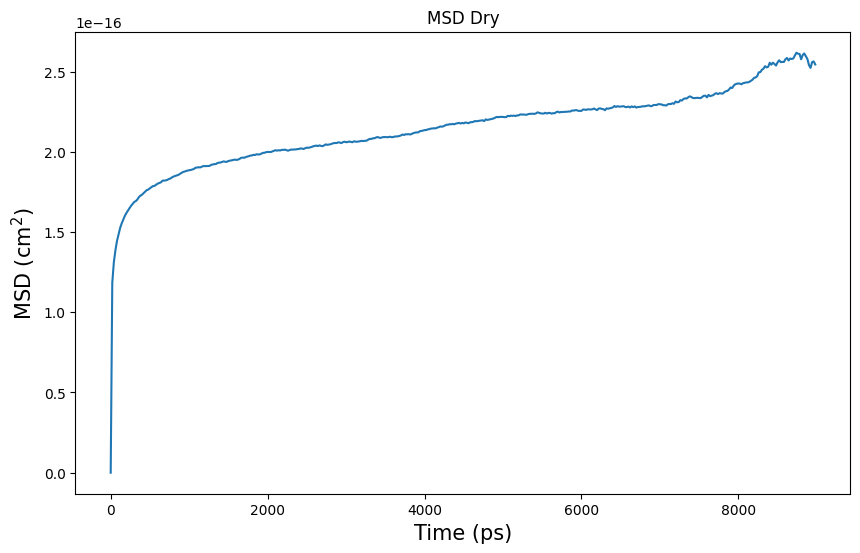

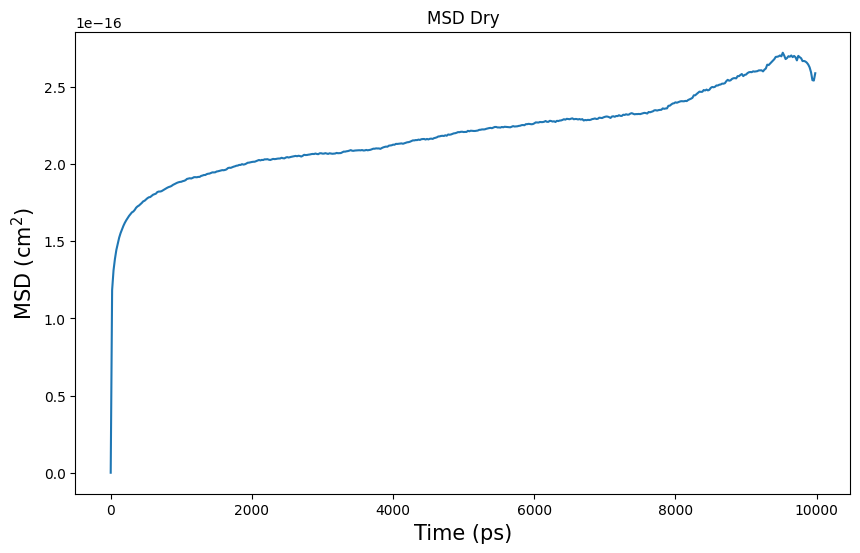

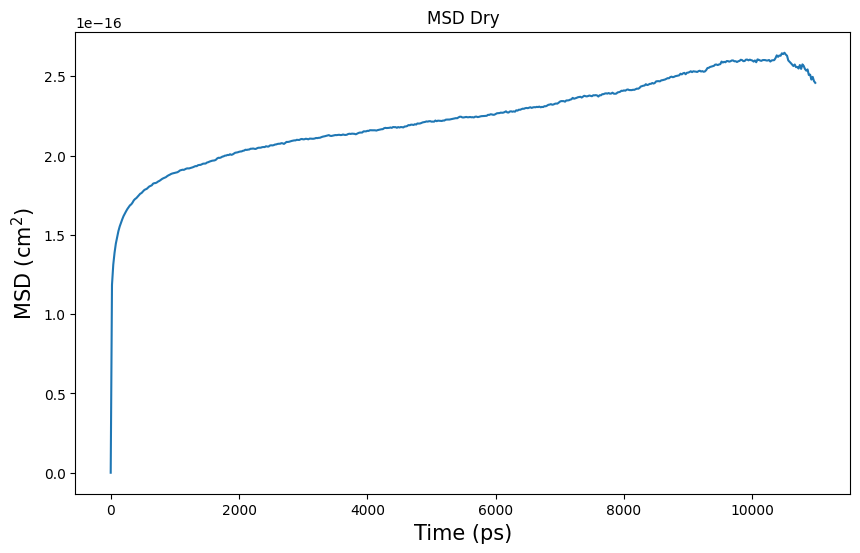

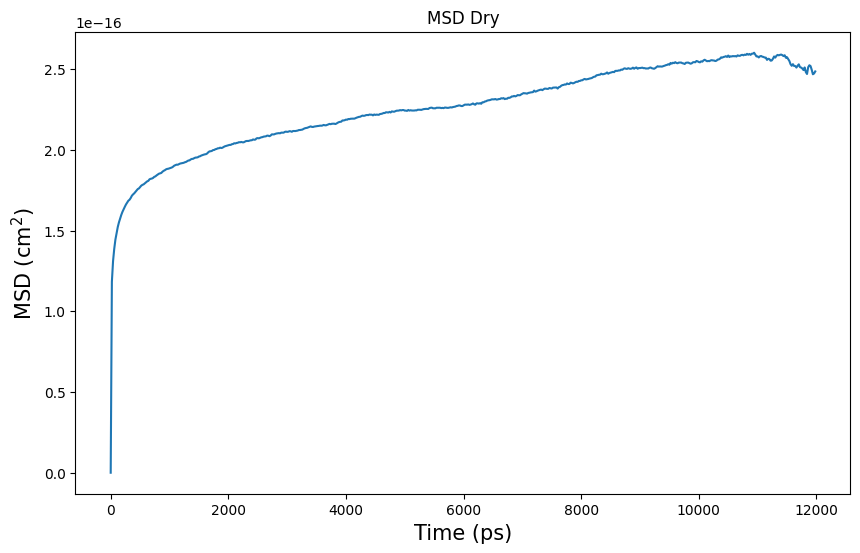

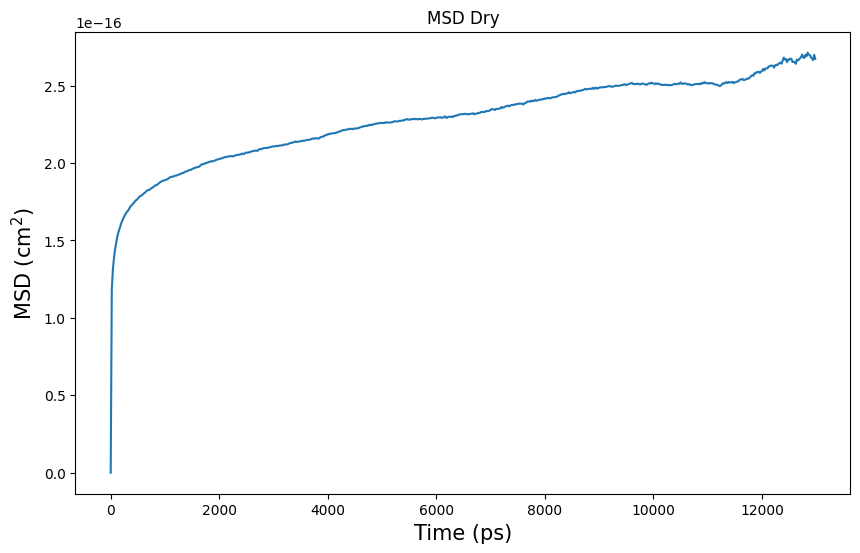

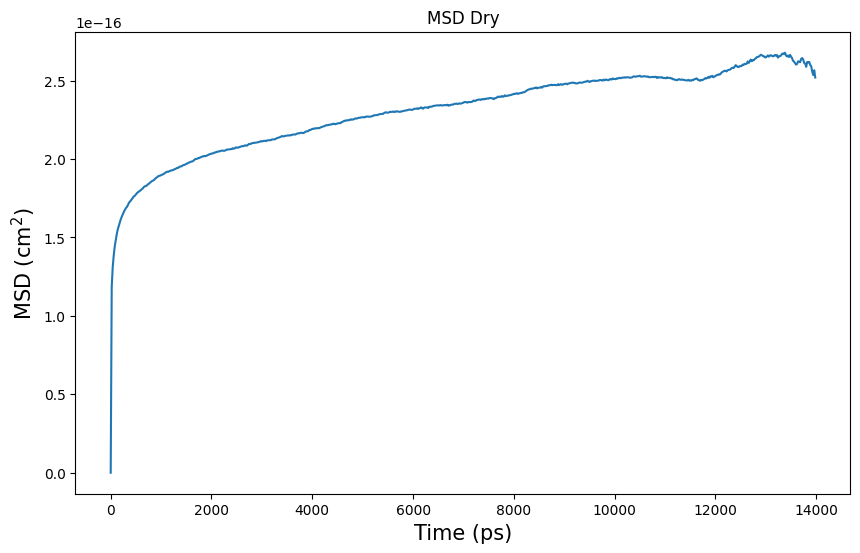

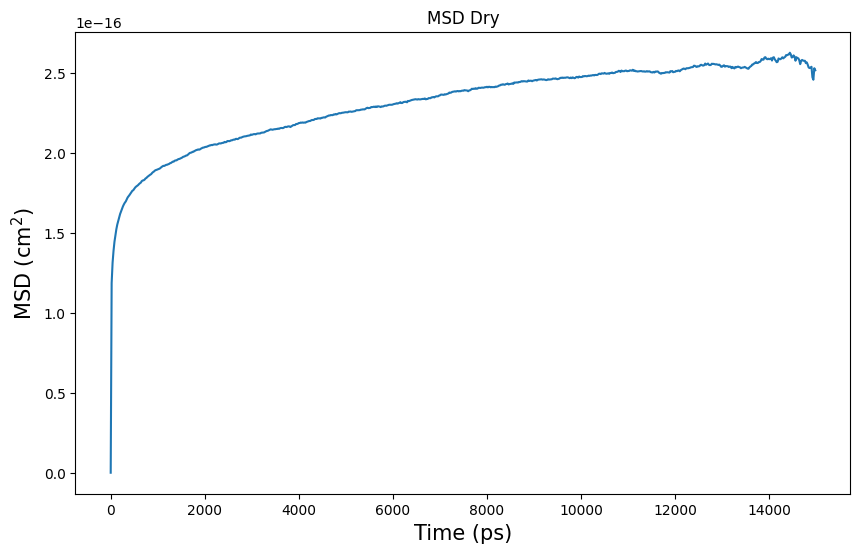

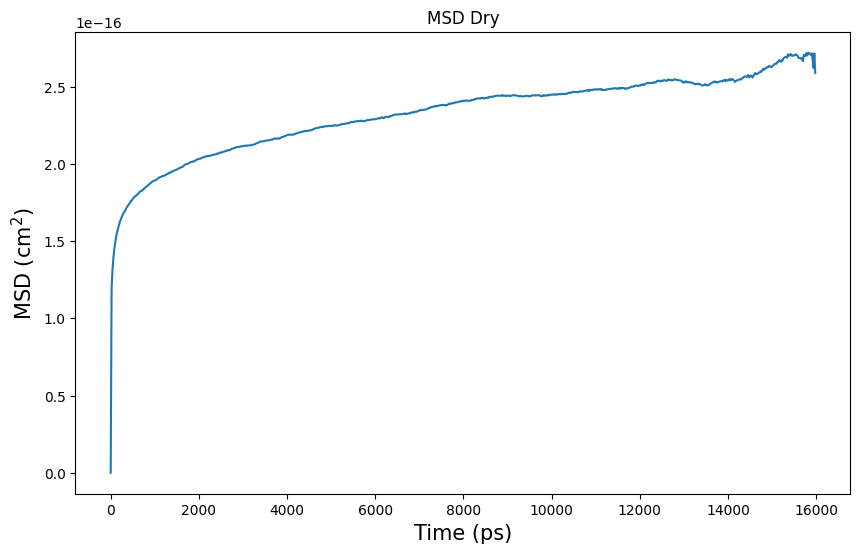

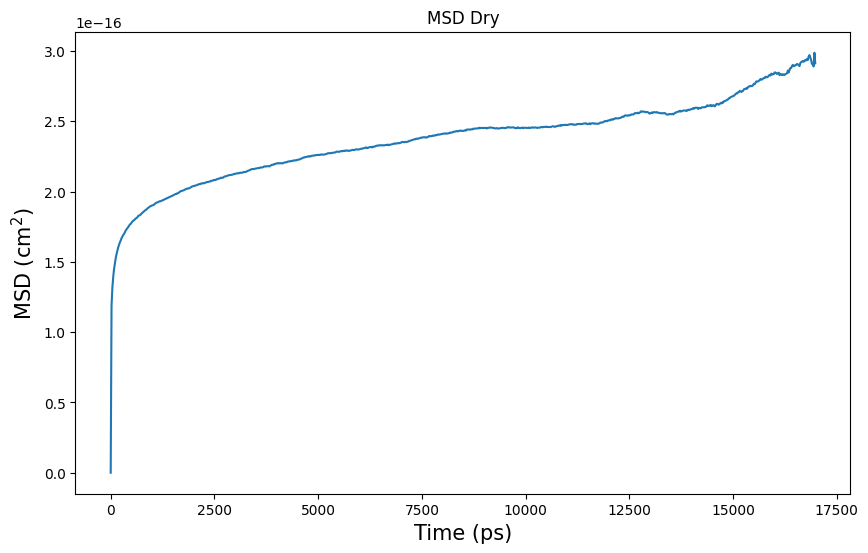

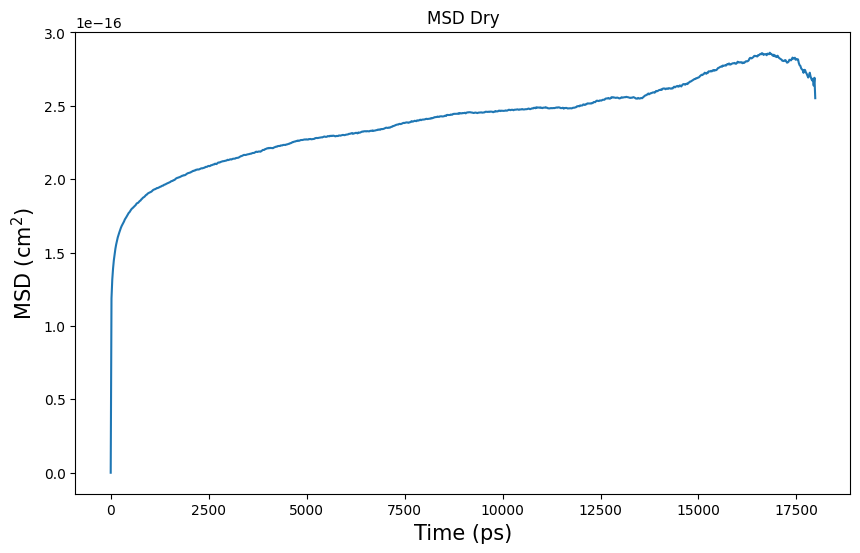

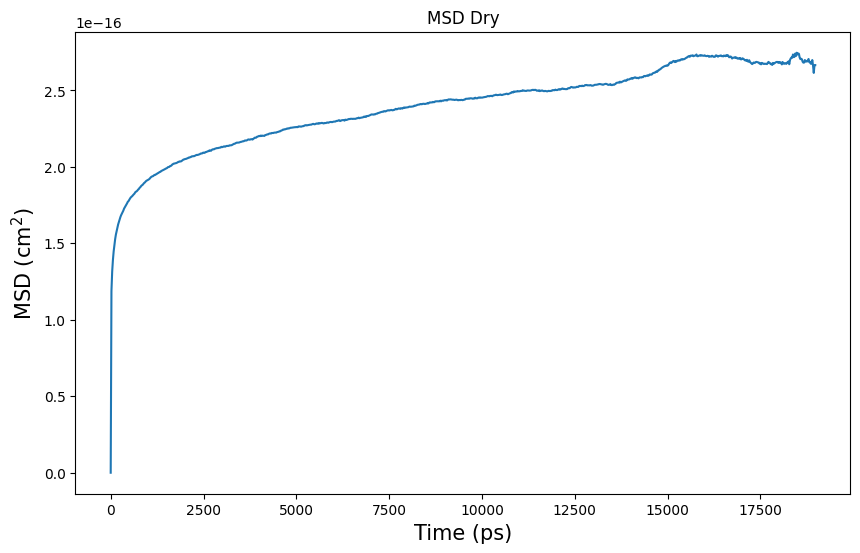

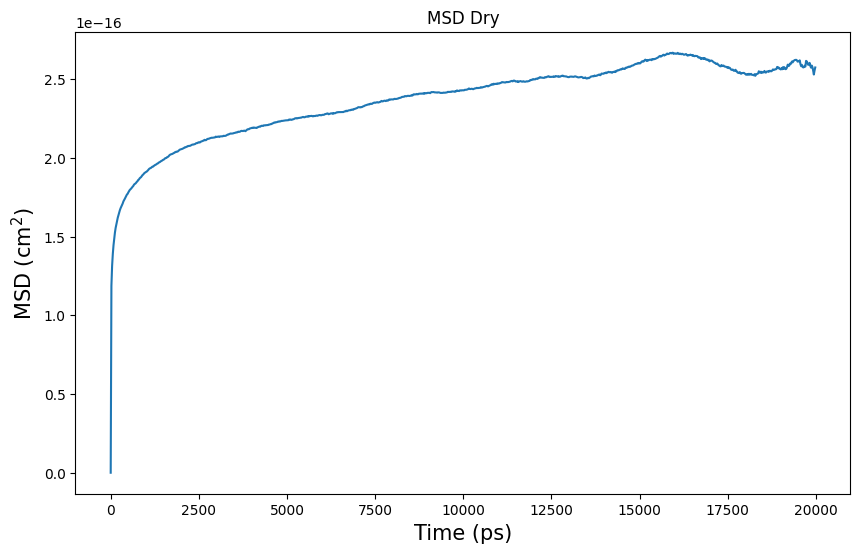

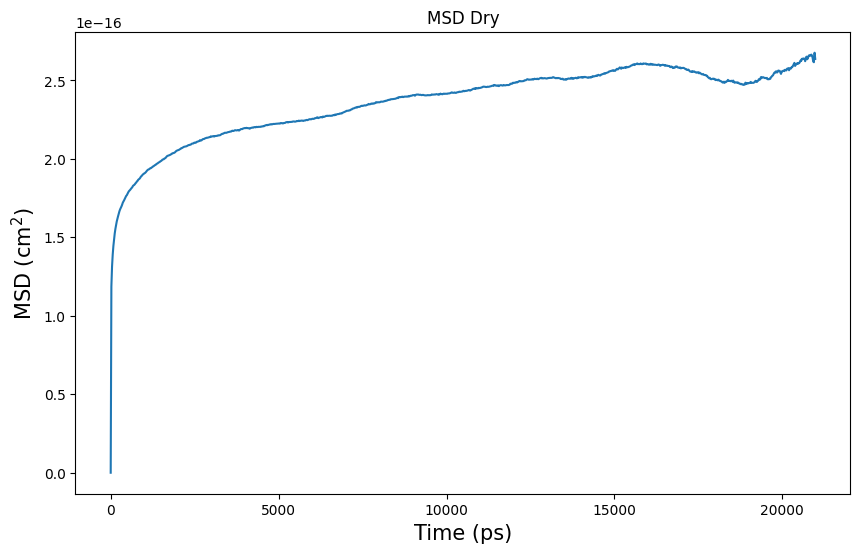

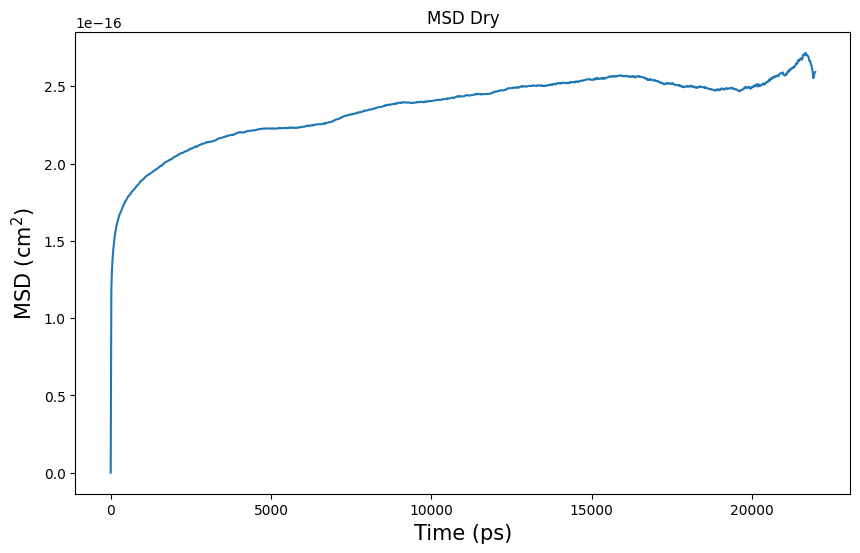

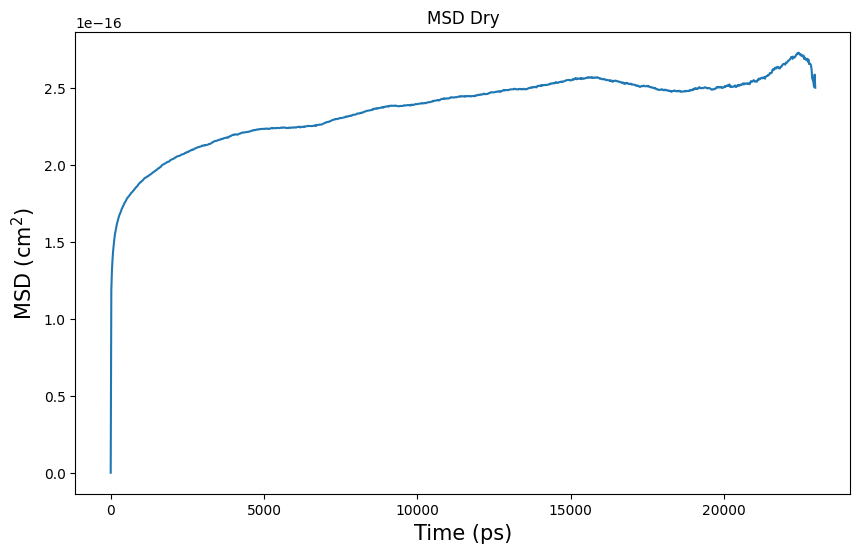

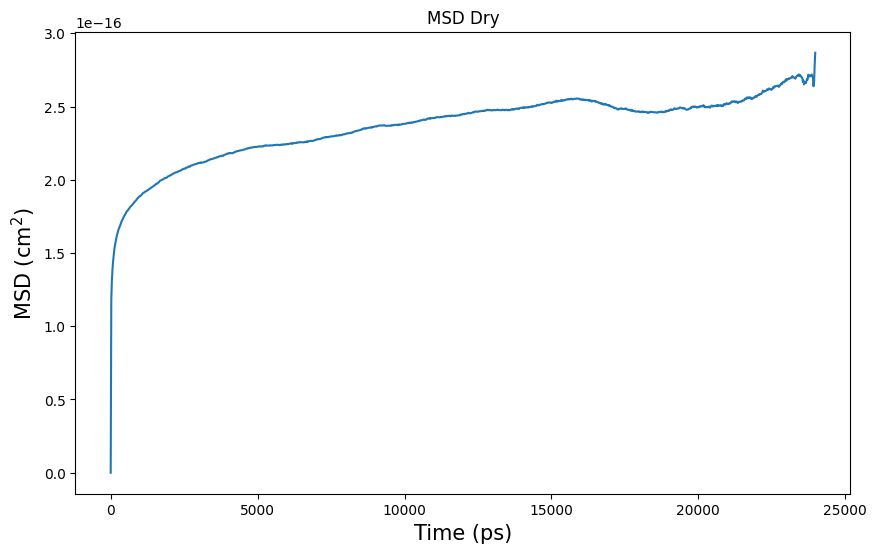

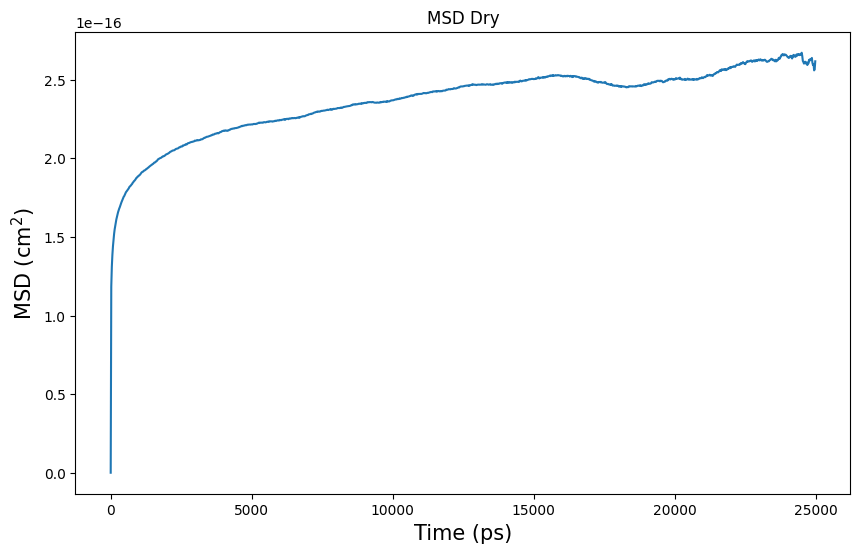

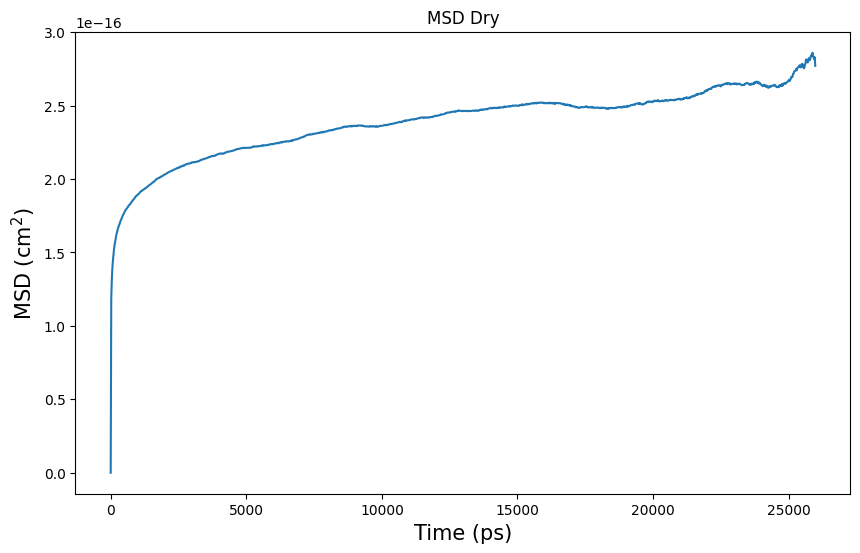

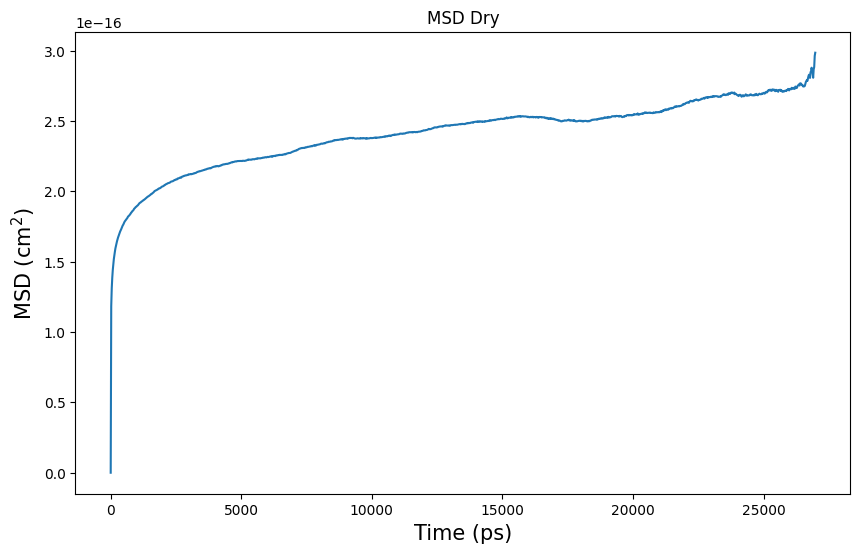

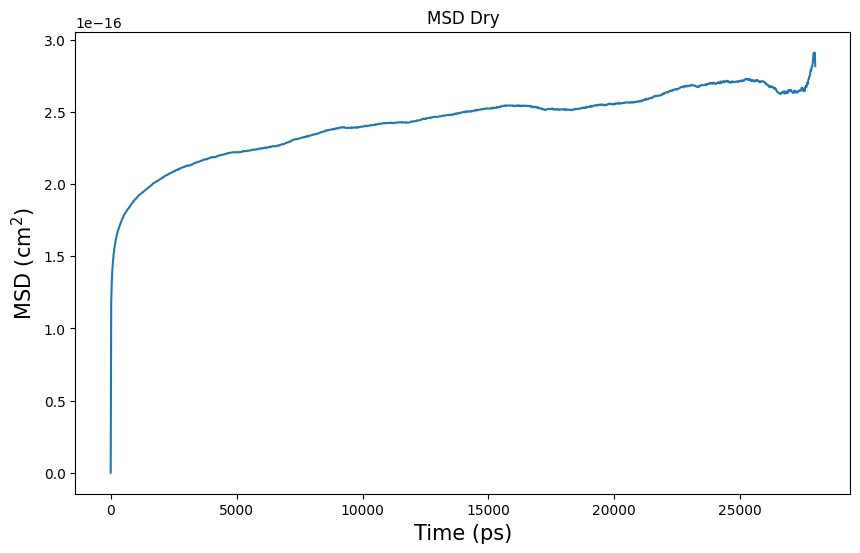

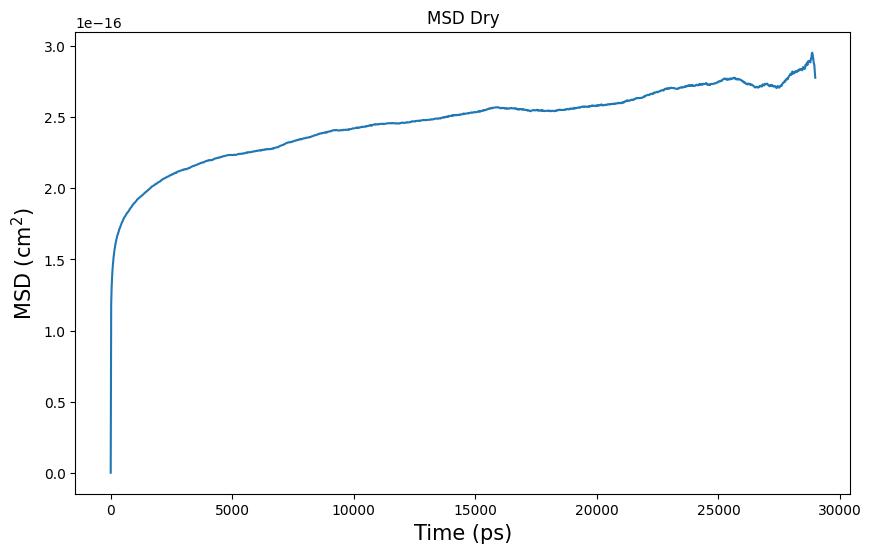

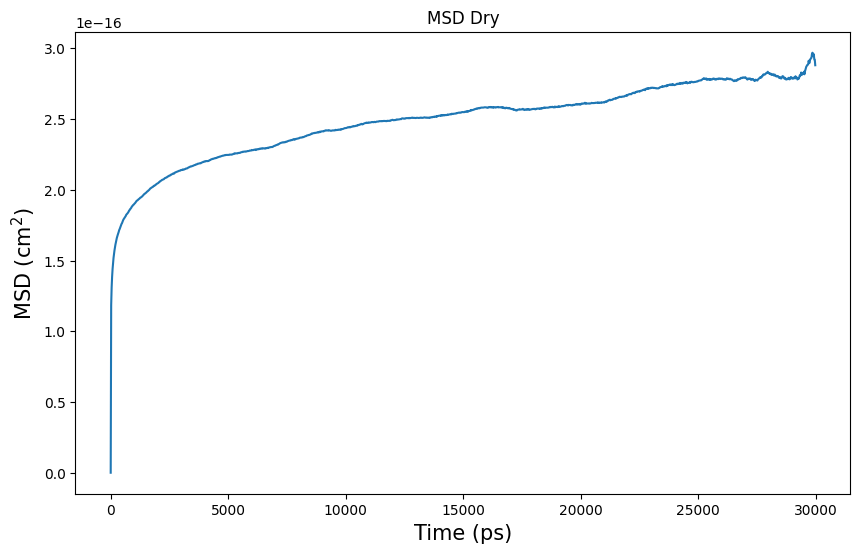

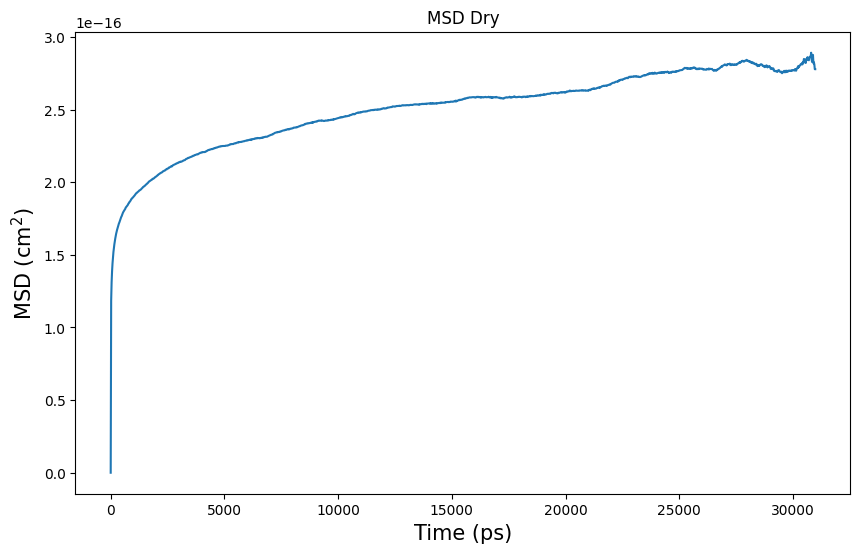

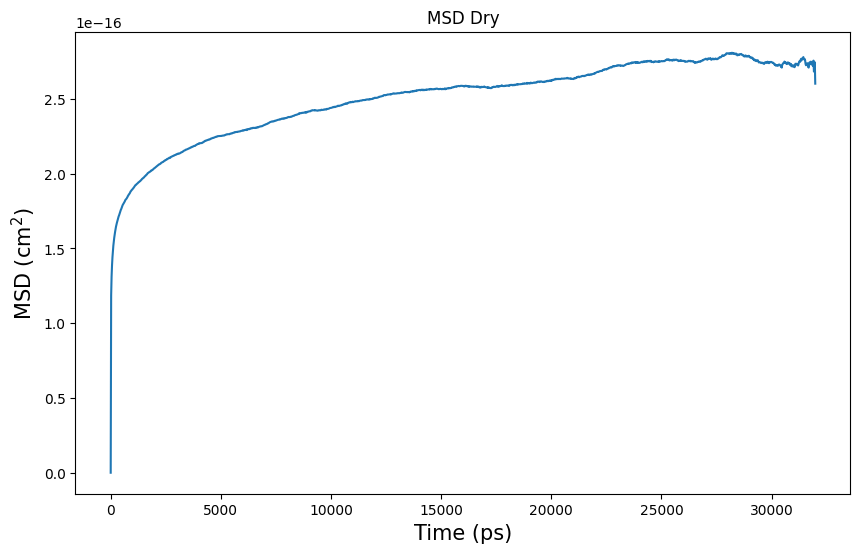

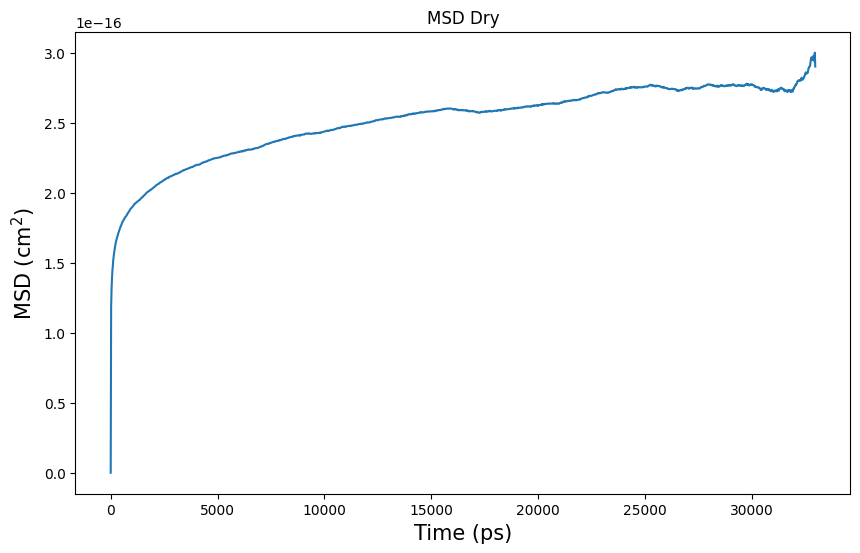

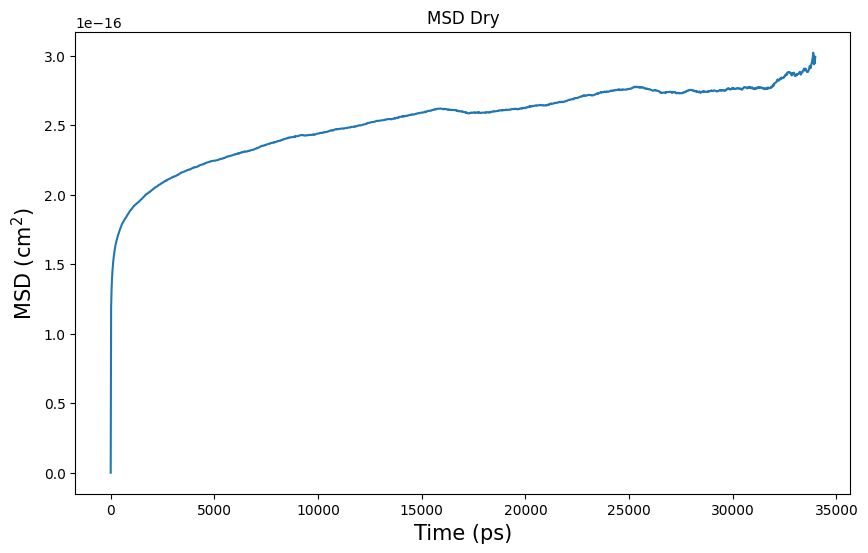

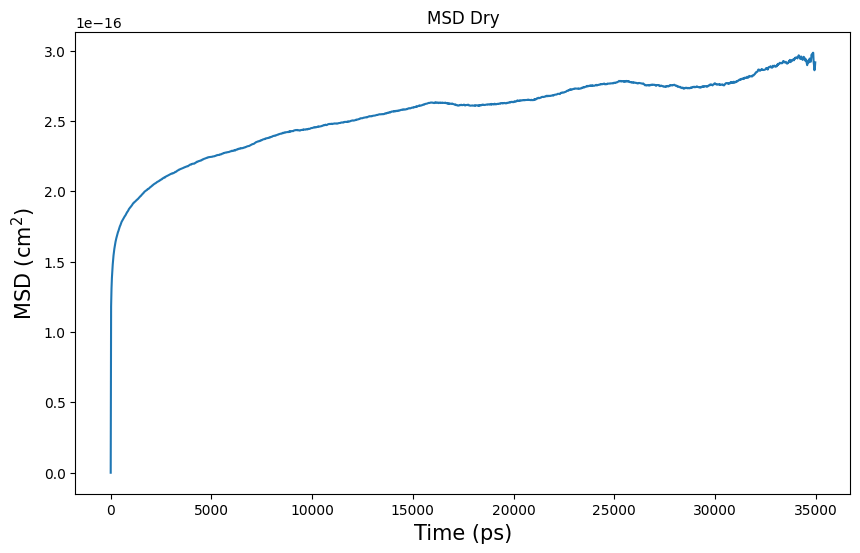

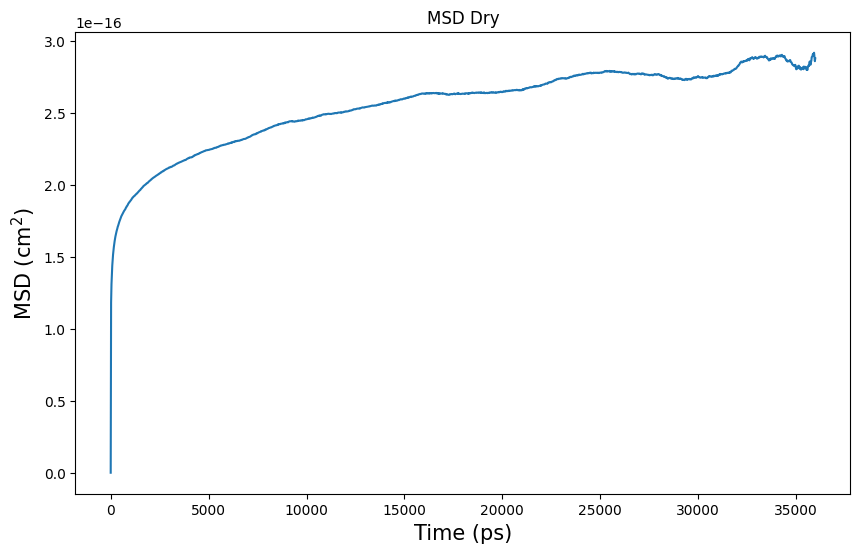

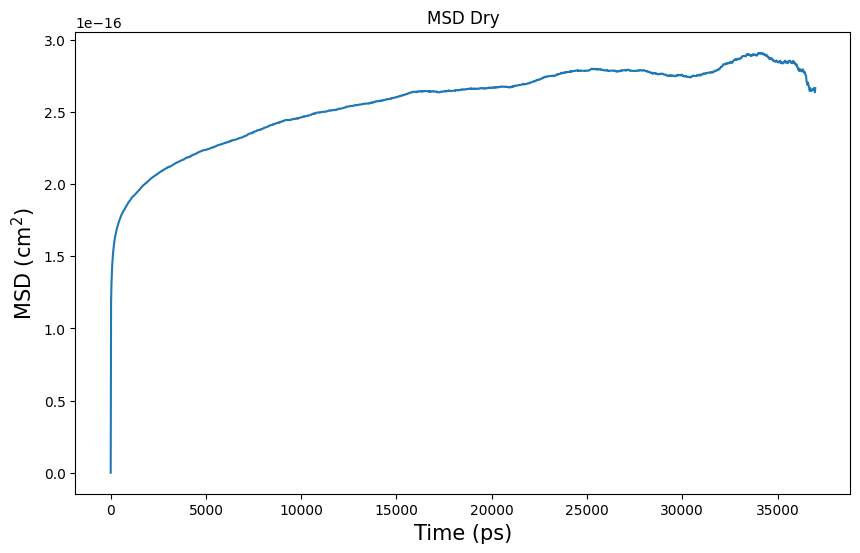

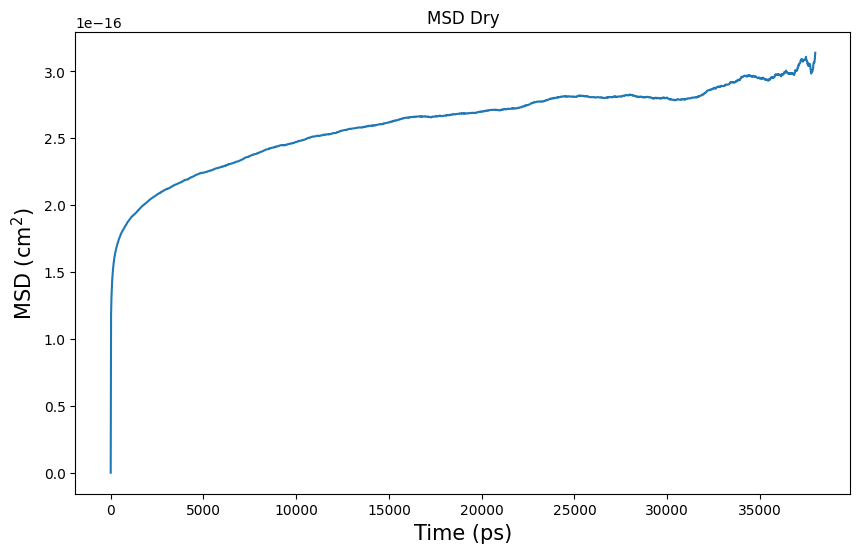

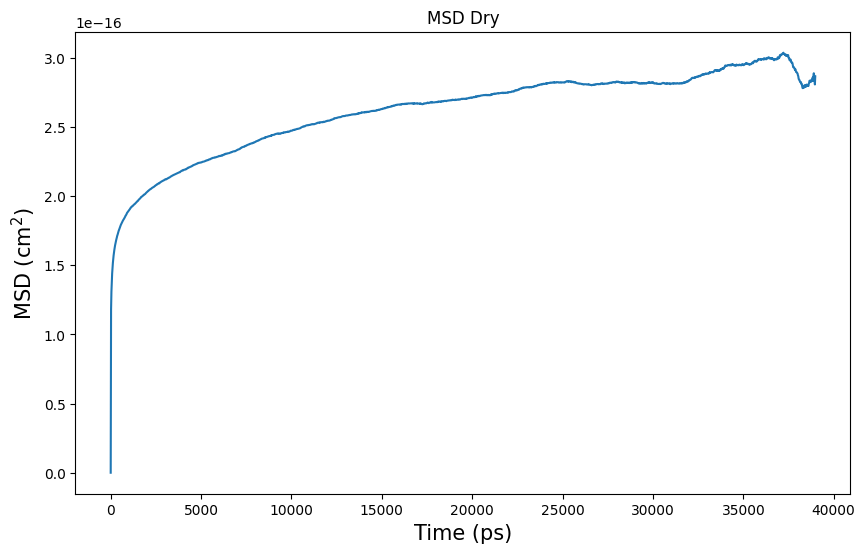

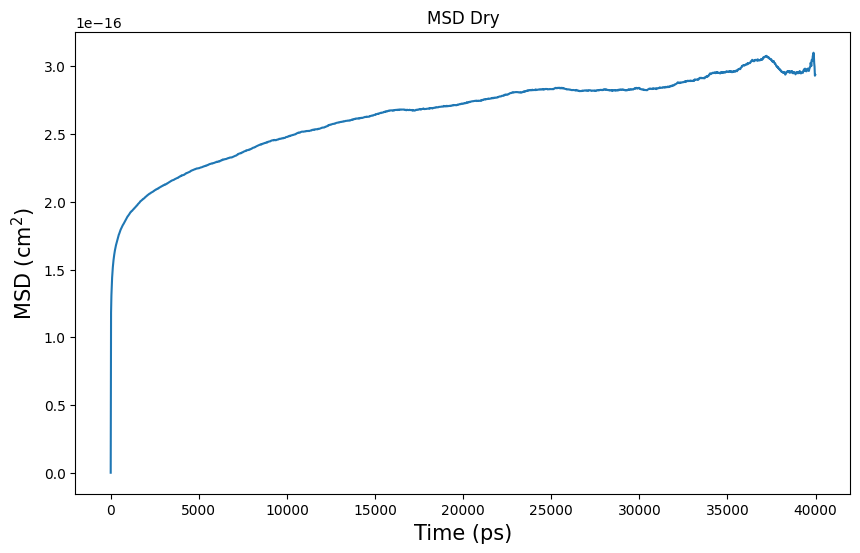

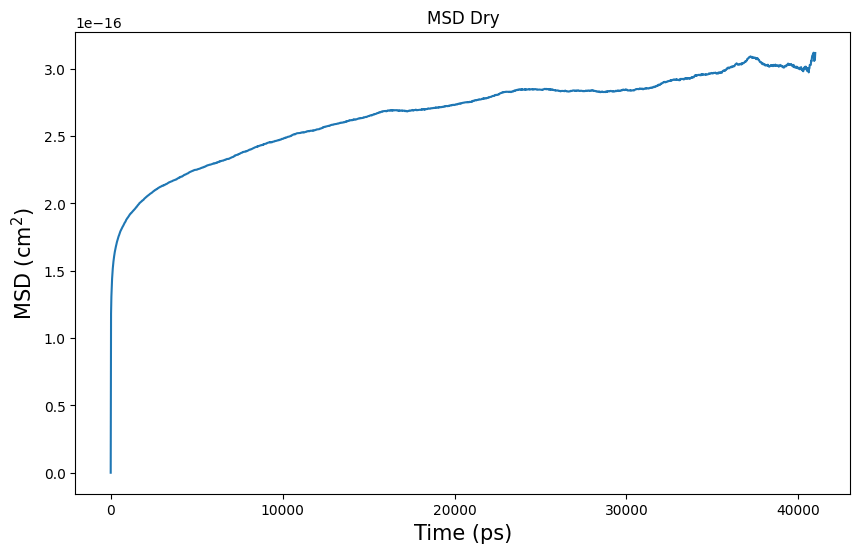

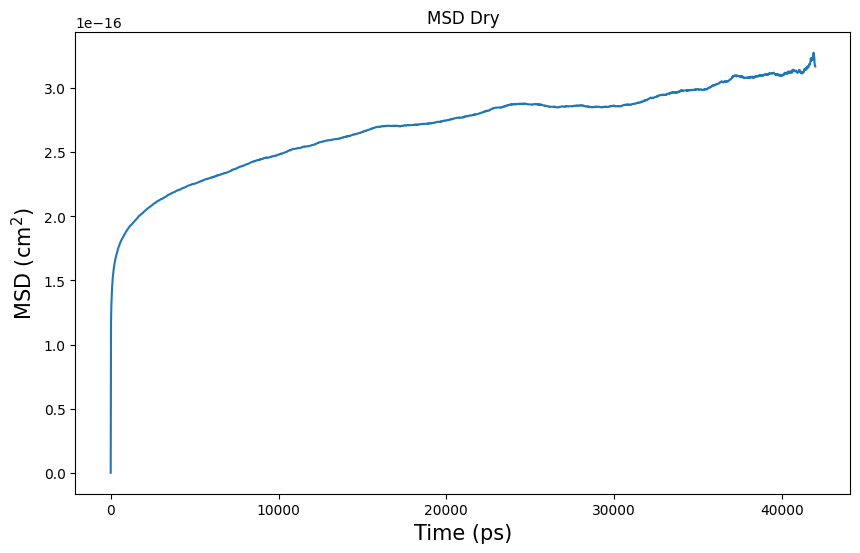

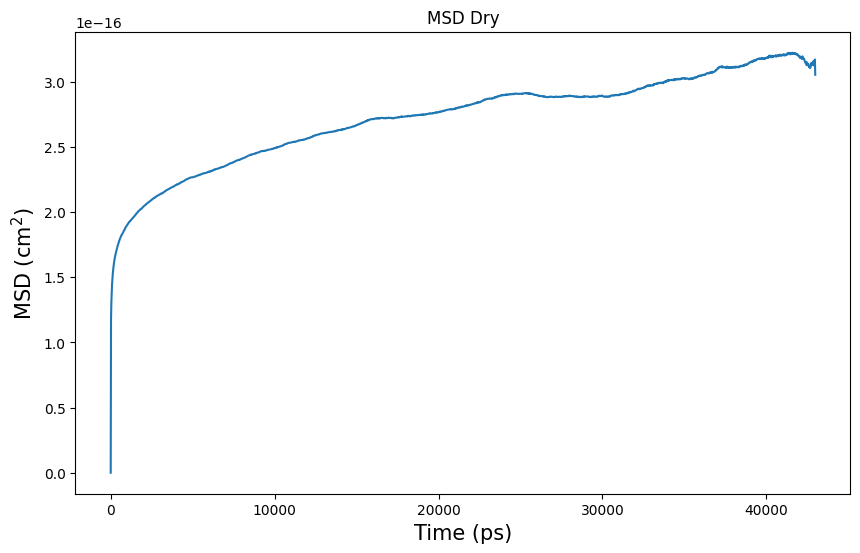

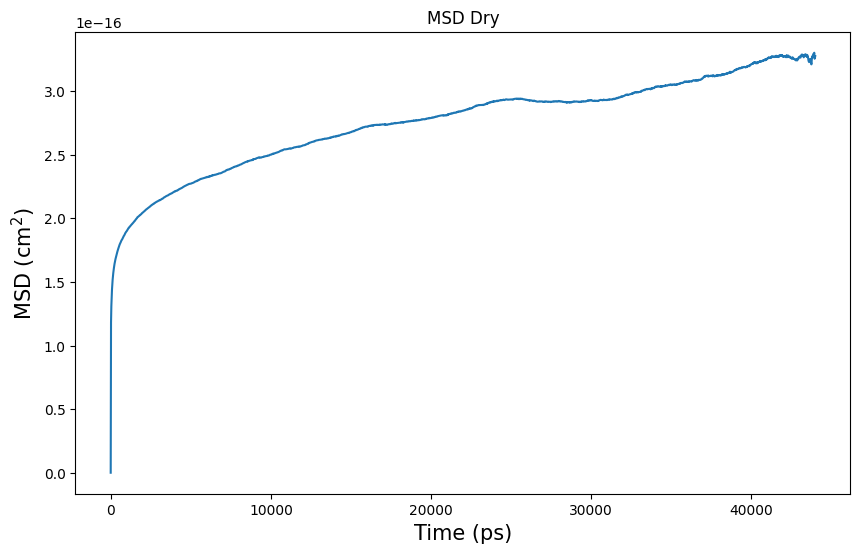

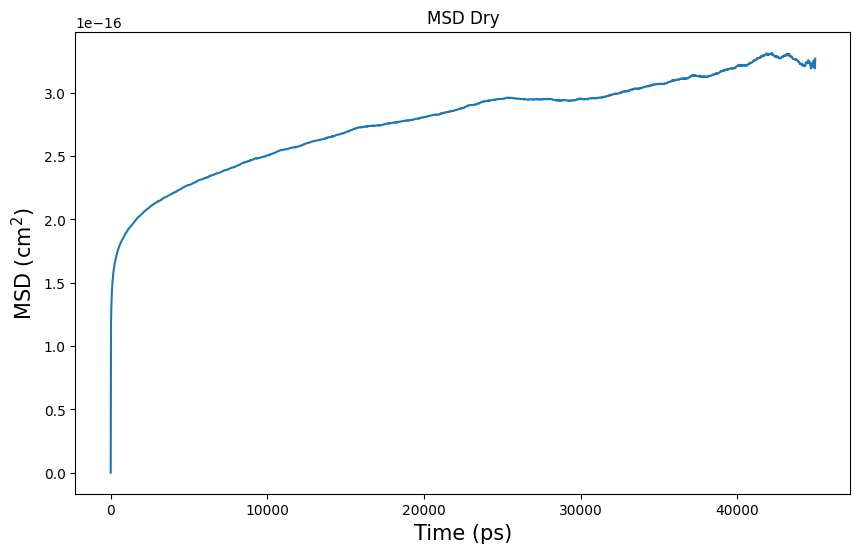

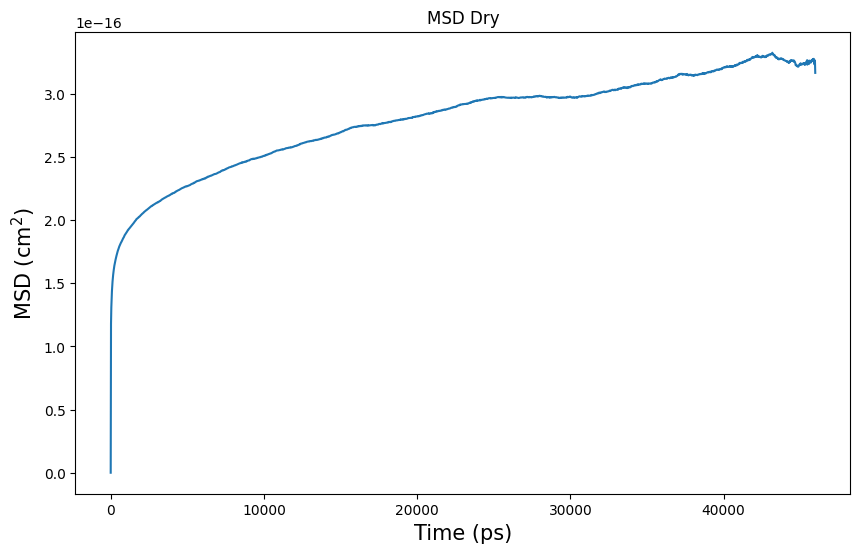

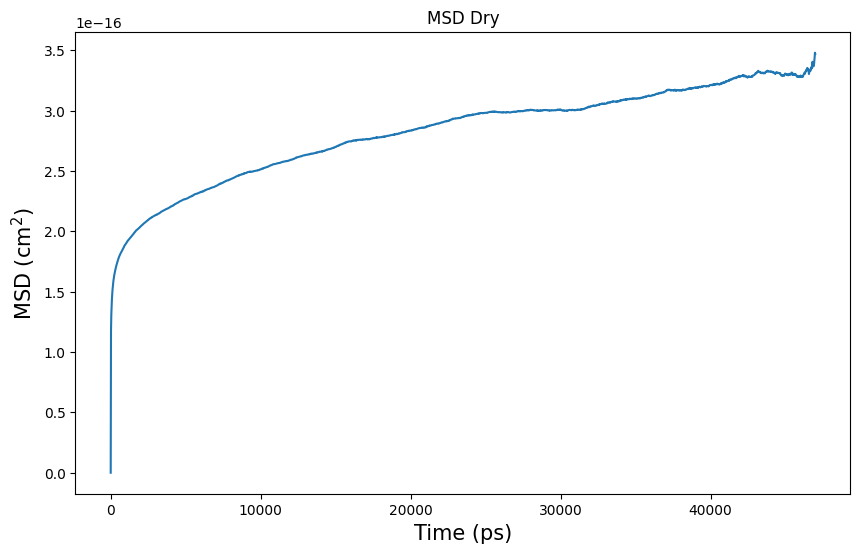

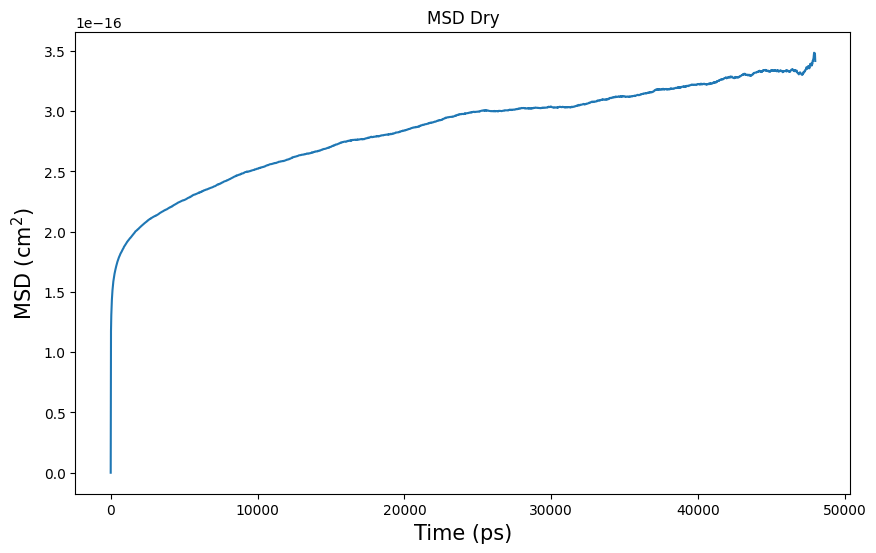

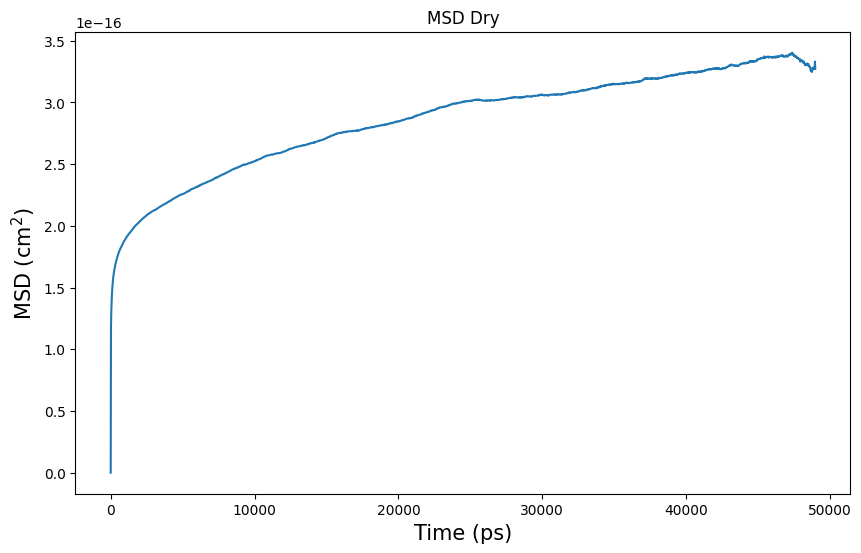

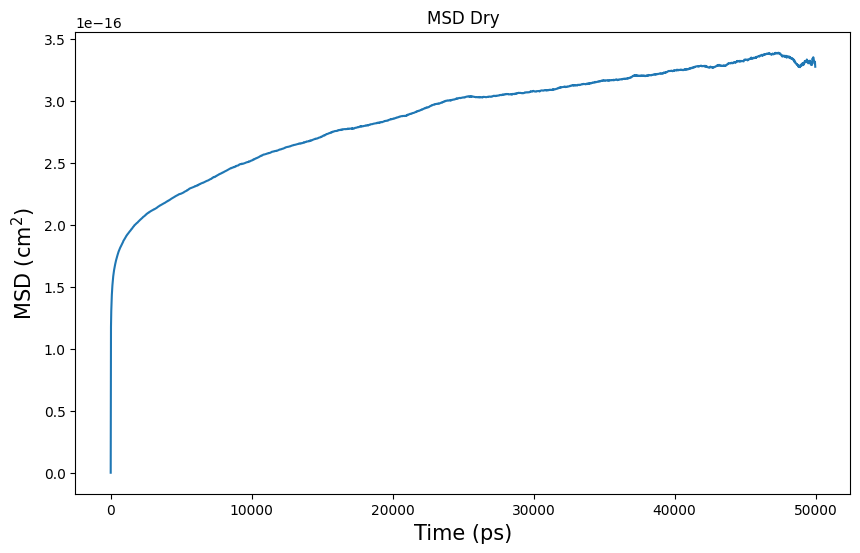

In [2]:
%matplotlib inline
# Plot the MSD curves
diffusion.msd_300k_plotter(msd_array=msd_300k, lagtime_array=lagtimes_300k, is_dry=True)

### Diffusion Coefficient of Naproxen - Dry Config 1

Having obtained the MSDs and the lagtimes, we are now in a position to calcualte the diffusion coefficient and plot. We inspect each MSD to find a start and end fit time. The slope of the MSD is then calcualted in this region. We then use the Einstein relation mentioned above. Because each MSD spans a longer simulation time, we hope that if we run for long enough, convergence will emerge.

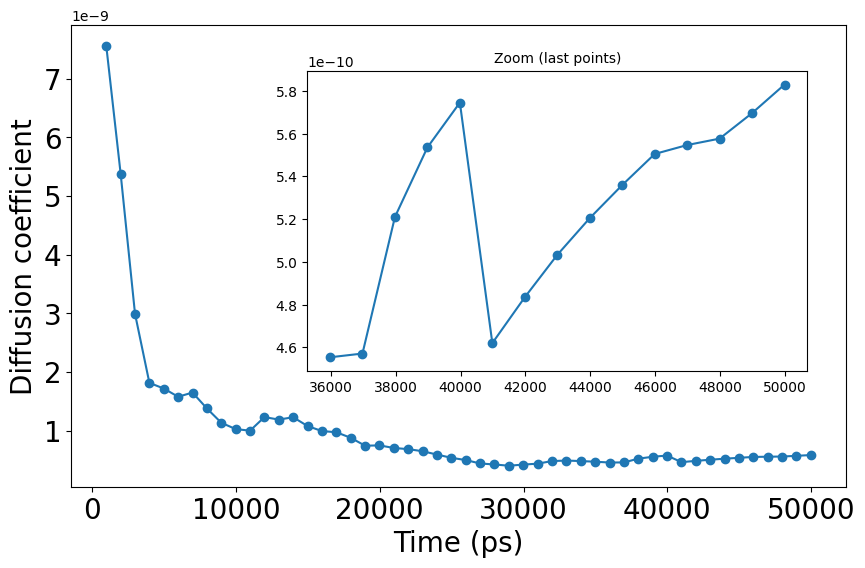

In [3]:
# Start and fit times
start_fit = [
    300,
    300,
    500,
    1000,
    1000,
    1000,
    1000,
    1000,
    1500,
    2000,
    2000,
    2000,
    2000,
    2000,
    2000,
    2000,
    2000,
    2500,
    5000,
    2500,
    2500,
    6000,
    6000,
    6000,
    6000,
    6000,
    7000,
    7000,
    7500,
    7500,
    8000,
    8000,
    8000,
    8000,
    8000,
    9000,
    9000,
    8000,
    8000,
    8000,
    8000,
    8000,
    8000,
    8000,
    8000,
    8000,
    8000,
    8000,
    8000,
    8000,
]

end_fit = [
    500,
    750,
    1500,
    2000,
    2500,
    3000,
    3000,
    4000,
    4000,
    5000,
    5000,
    5000,
    6000,
    6000,
    7000,
    8000,
    8000,
    9000,
    9500,
    10000,
    10000,
    11000,
    11500,
    12000,
    12500,
    13000,
    13500,
    14000,
    14500,
    15000,
    15000,
    15000,
    15000,
    15000,
    15000,
    15000,
    15000,
    15000,
    15000,
    15000,
    20000,
    20000,
    20000,
    20000,
    20000,
    20000,
    20000,
    20000,
    20000,
    20000,
]

# Compute the diffusion coefficient and plot
D_300, lagtime_end = diffusion.diffusion_coefficients_300k(
    msd_array=msd_300k,
    lagtime_array=lagtimes_300k,
    start_array_ps=start_fit,
    end_array_ps=end_fit,
)
diffusion.plot_diff_time_300k_inset(
    diff_array=D_300, lagtime_end_array=lagtime_end, is_dry=True
)

## MSD Curves at 300K - Wet Config 1

In [ ]:
# Organise the wet trajectories for analysing purposes
wet_traj_300k = diffusion.traj_organiser_300k(
    directory="/storage/chem/phuqdw/breaking-bad/diffusion", is_dry=False
)

# Compute MSDs at 300K for the wet case
wet_msds_300k, wet_lagtimes_300k = diffusion.msd_calculator(
    topology_file="wet_cooling_ramp.tpr",
    sorted_trajectory_array=wet_traj_300k,
    api_residue_name="NAP",
    msd_cache_file_name="wet_config1.npz",
)


100%|██████████| 7254/7254 [00:06<00:00, 1193.94it/s]


Saved MSD data to wet_config1.npz


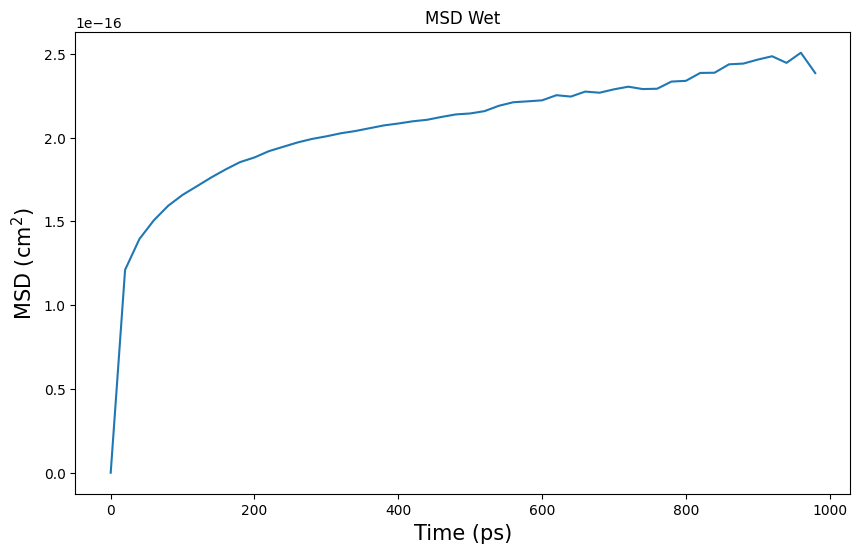

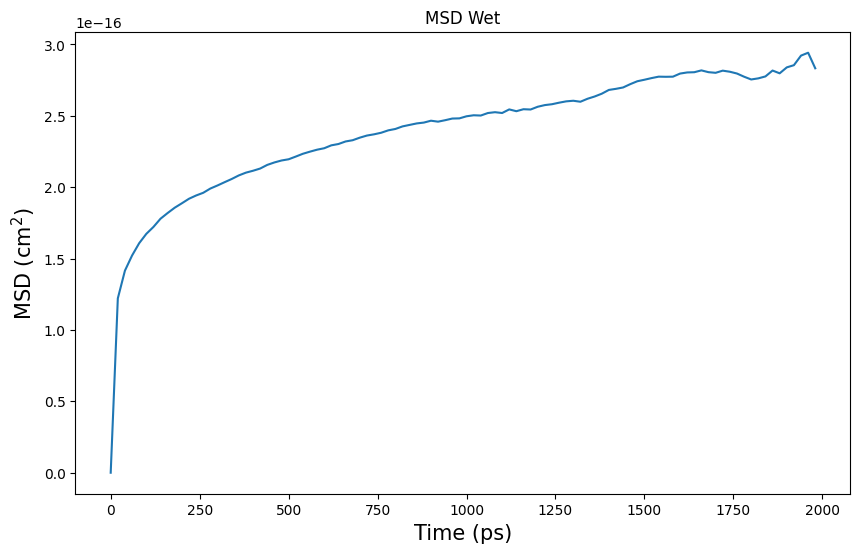

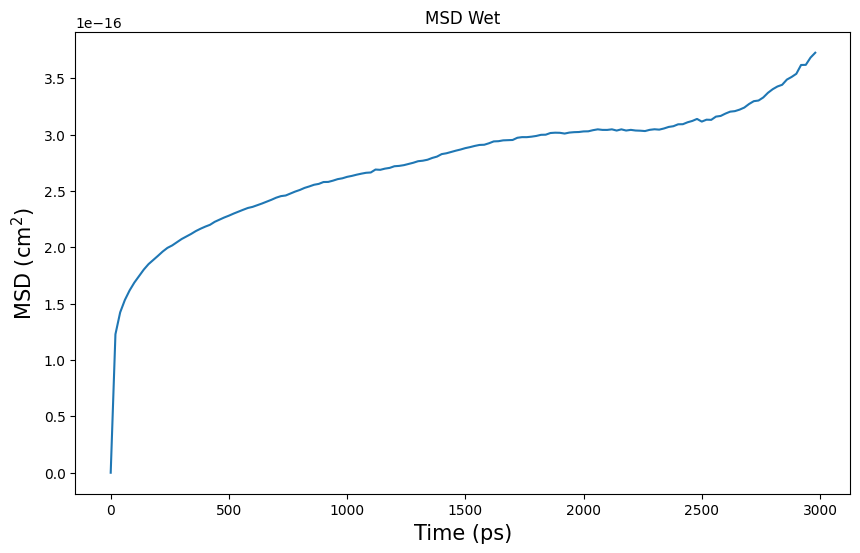

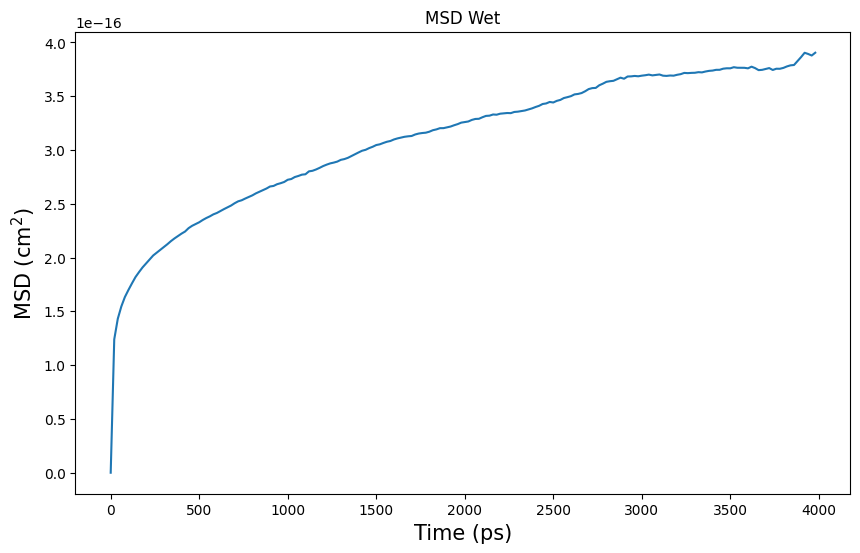

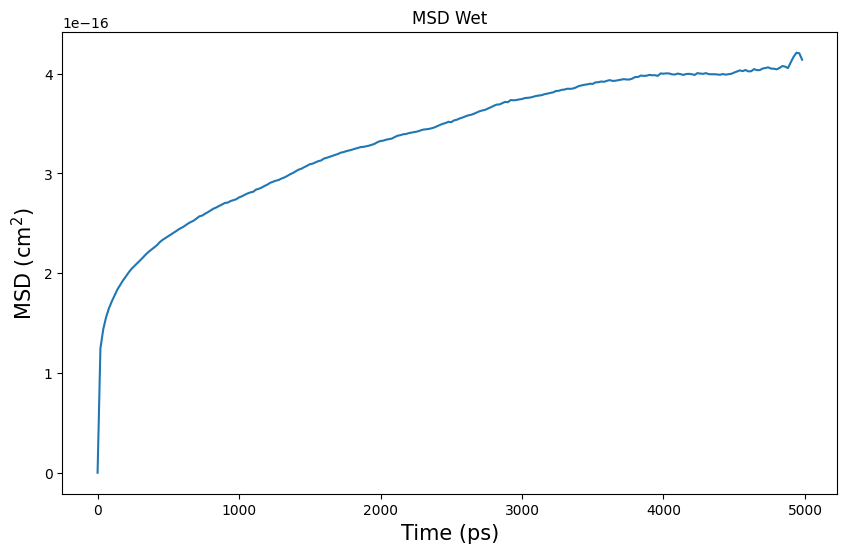

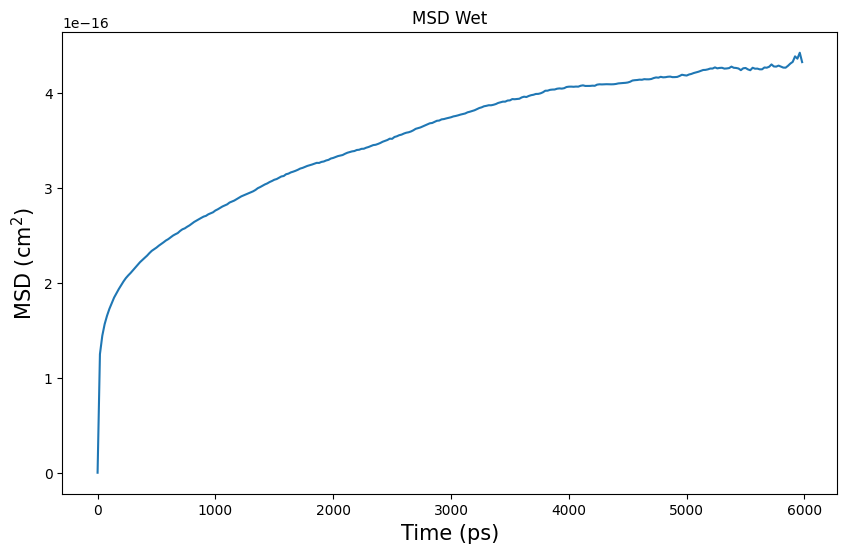

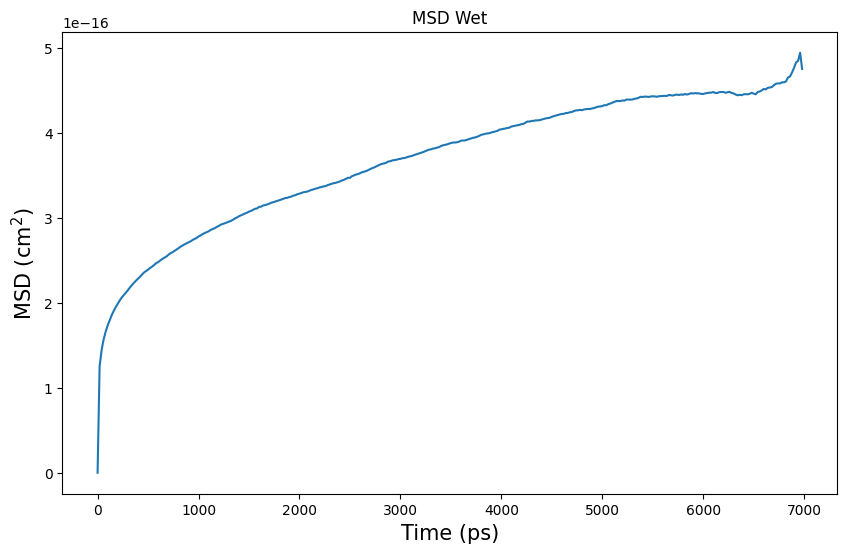

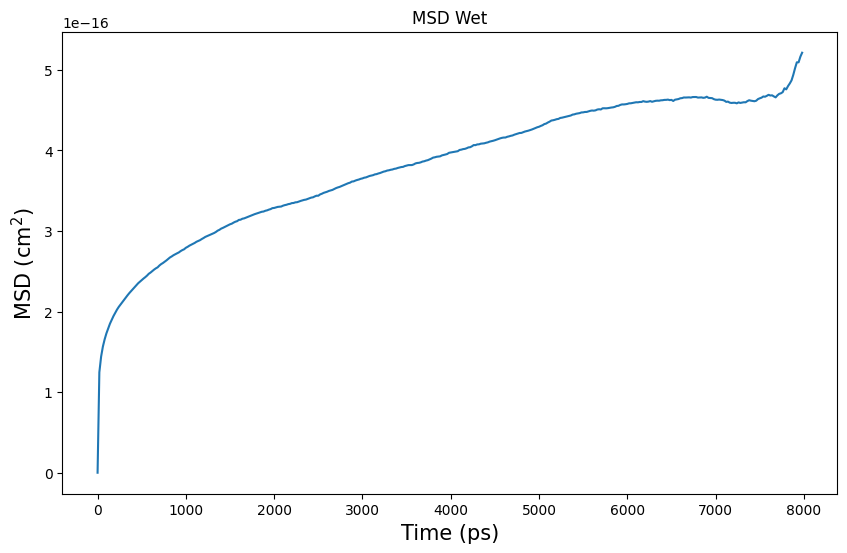

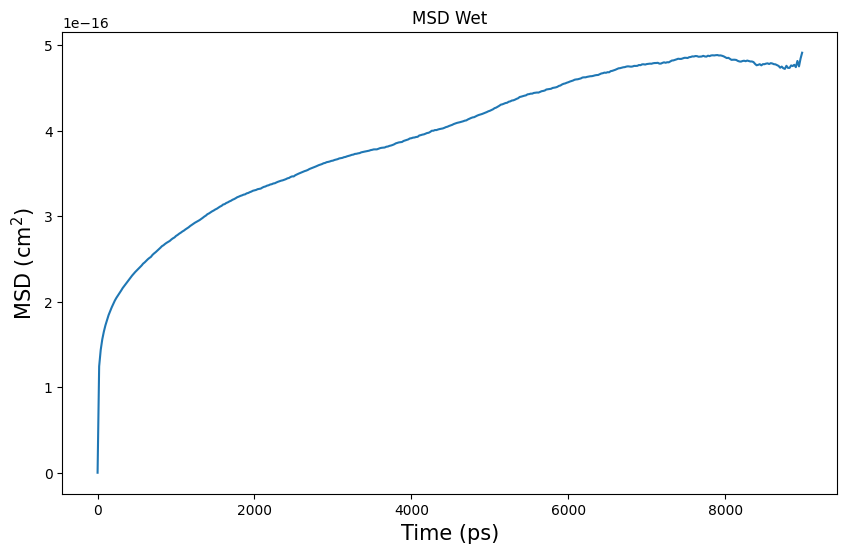

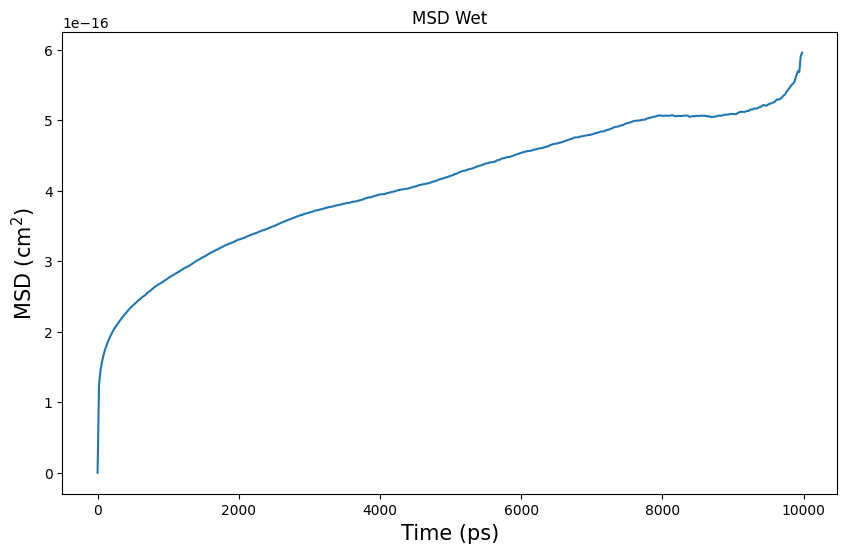

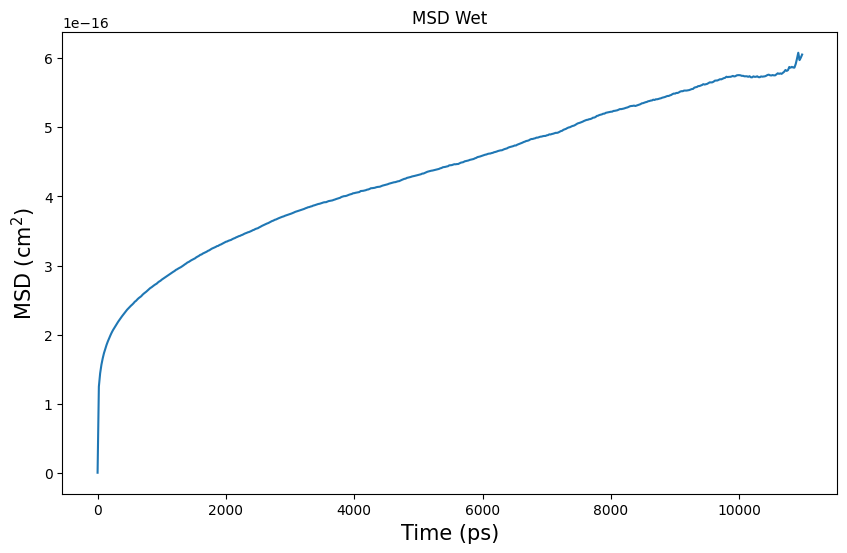

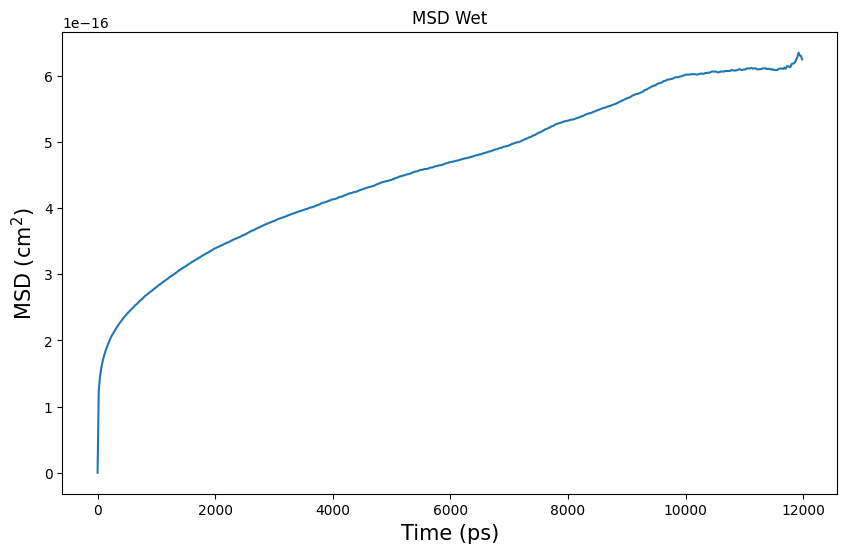

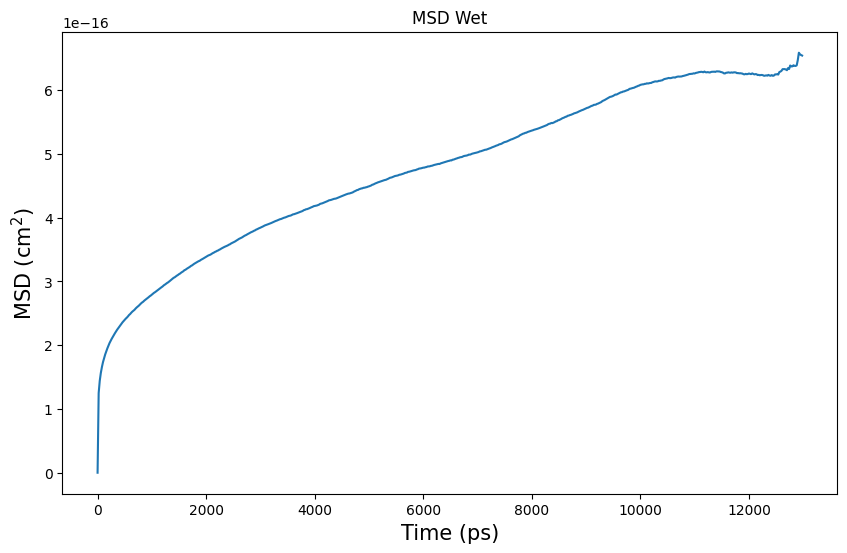

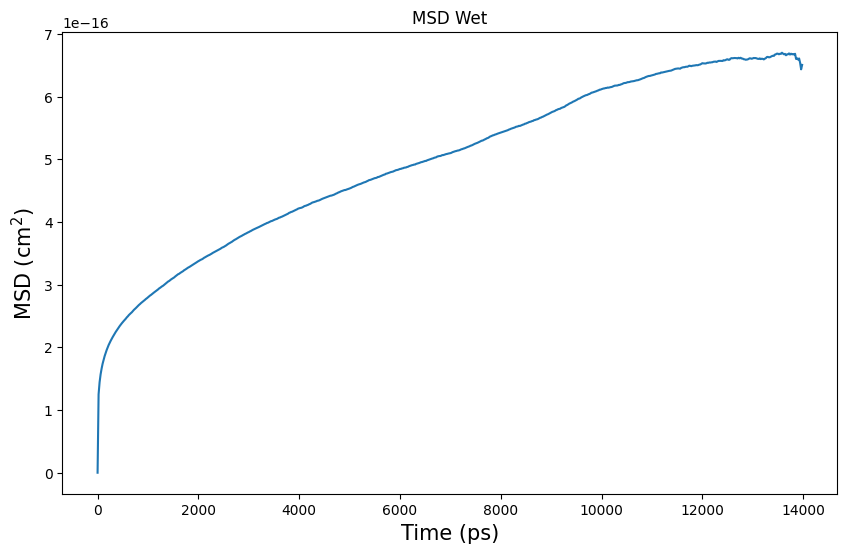

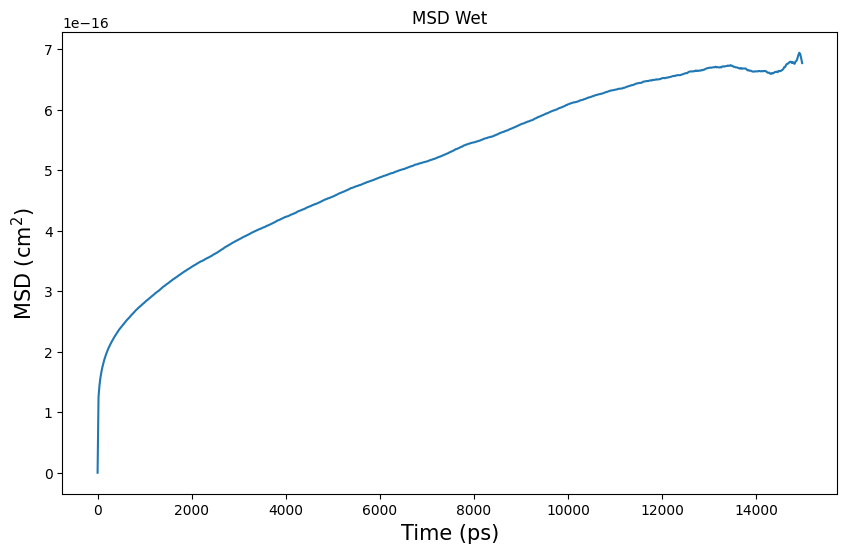

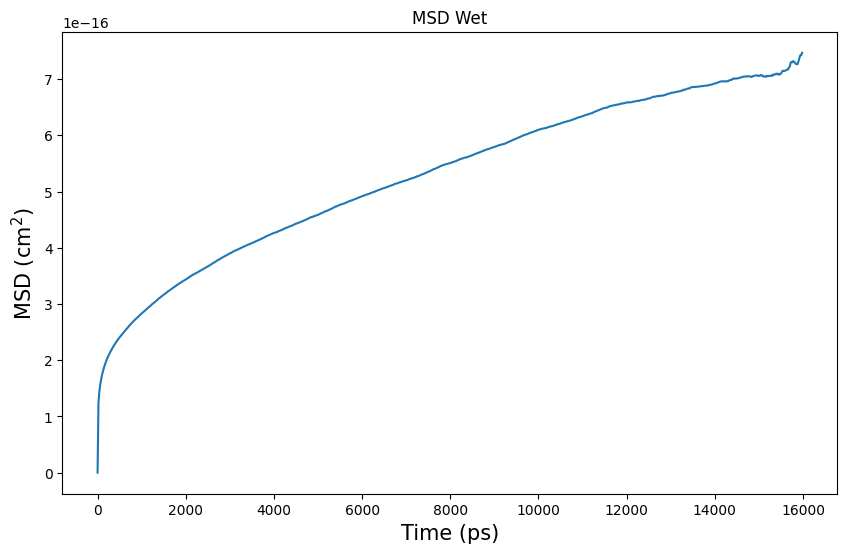

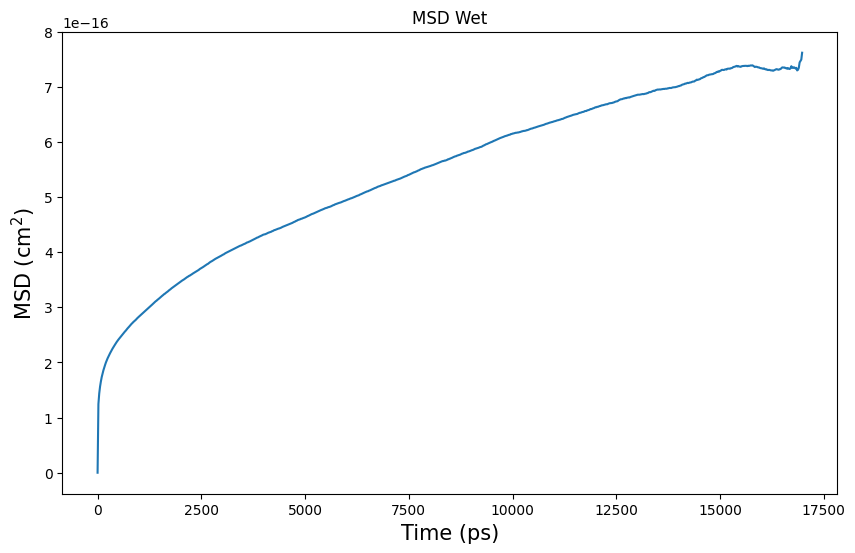

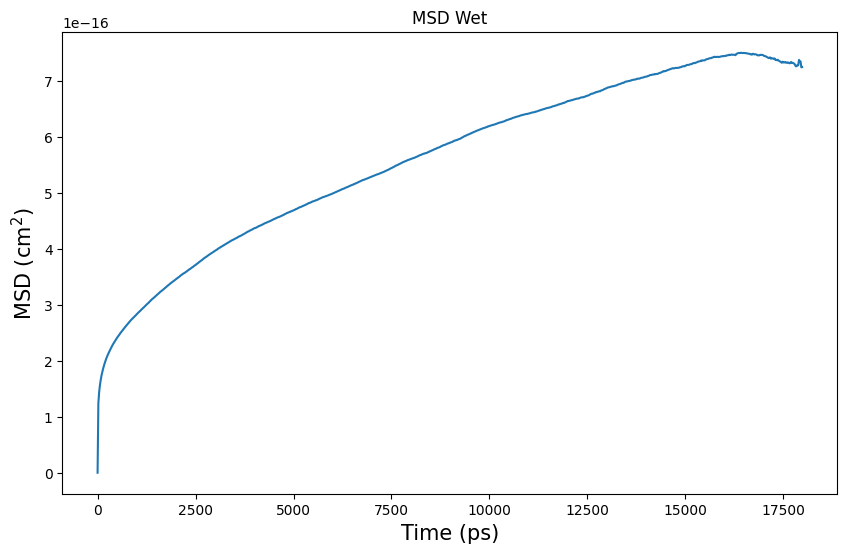

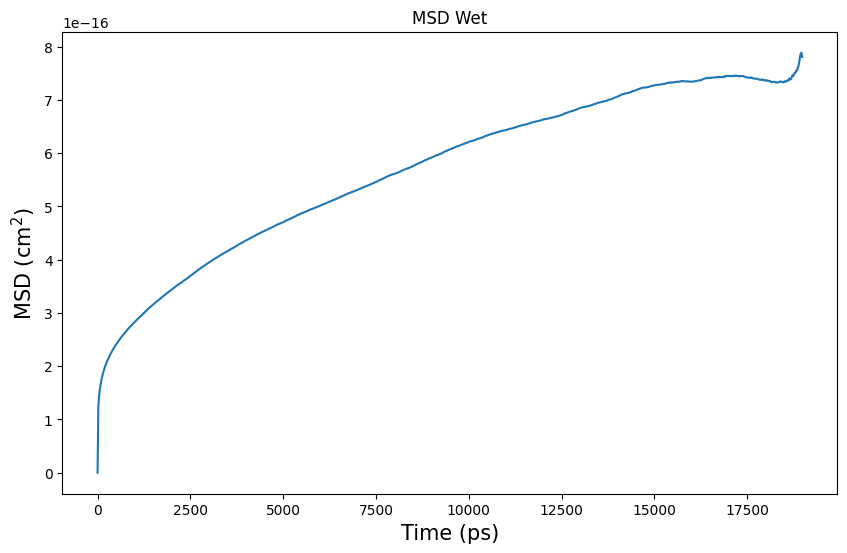

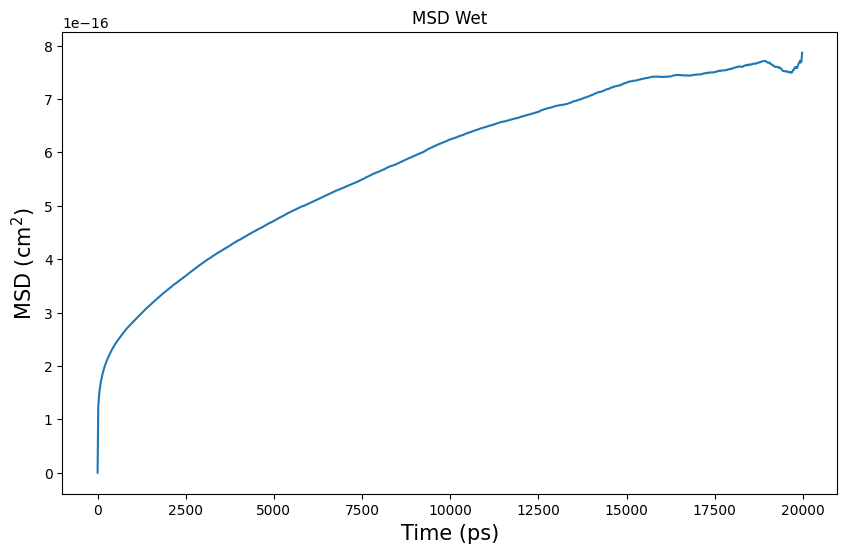

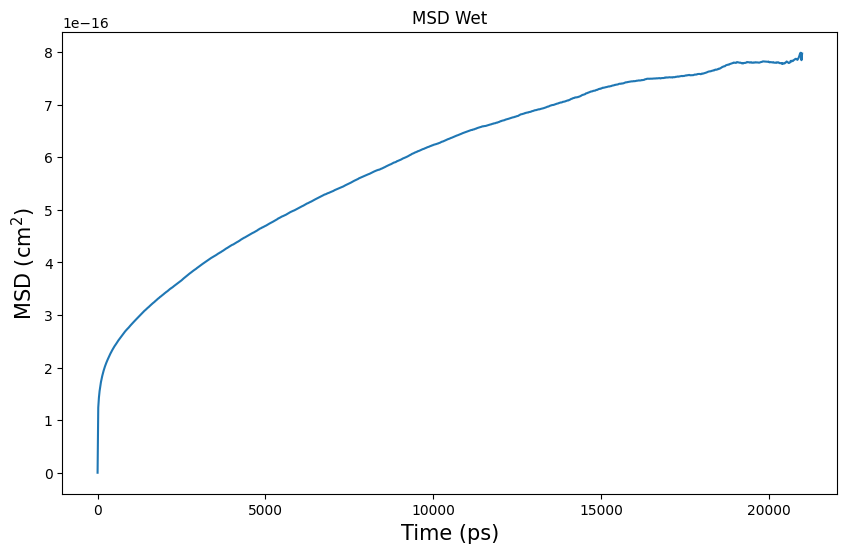

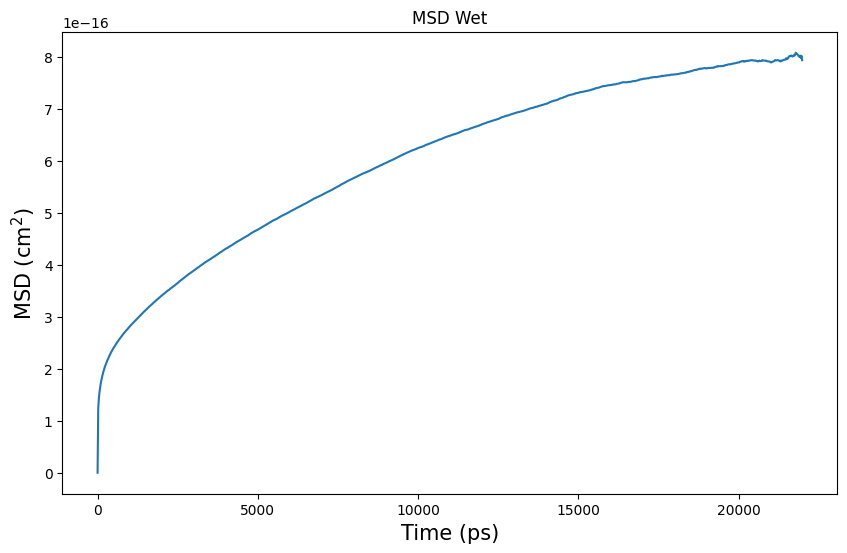

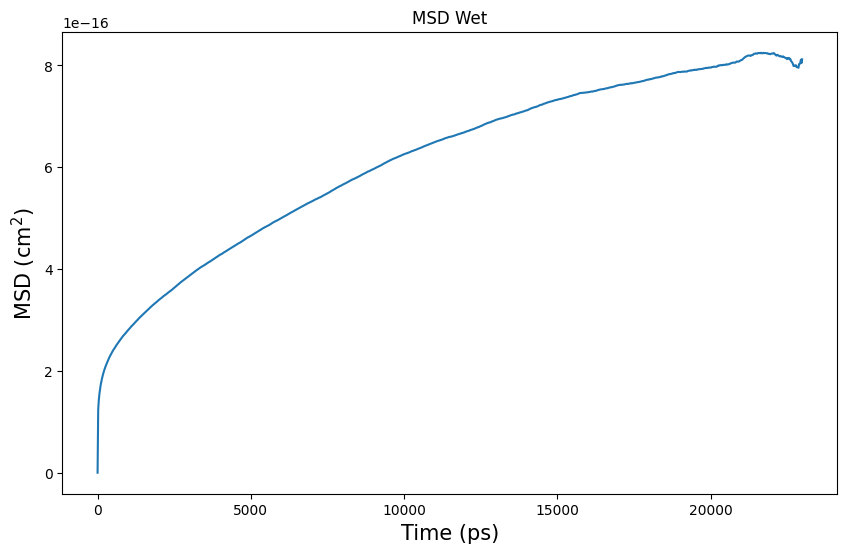

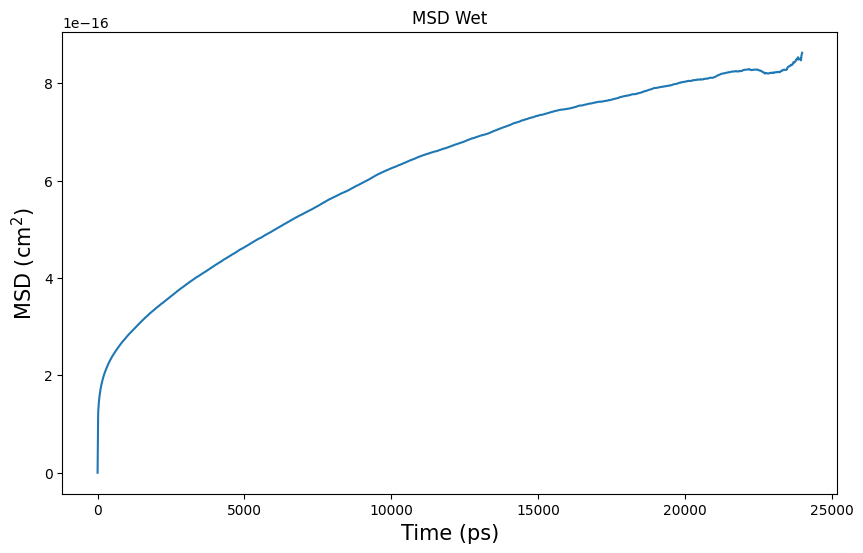

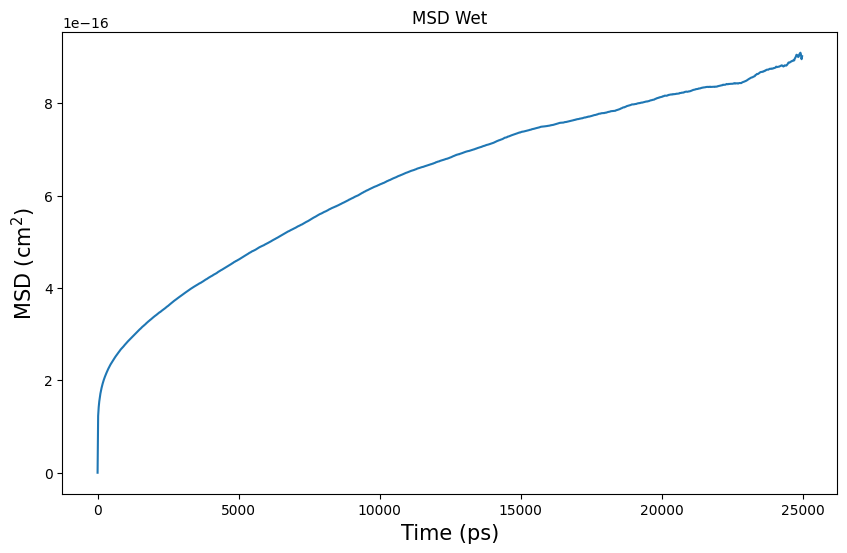

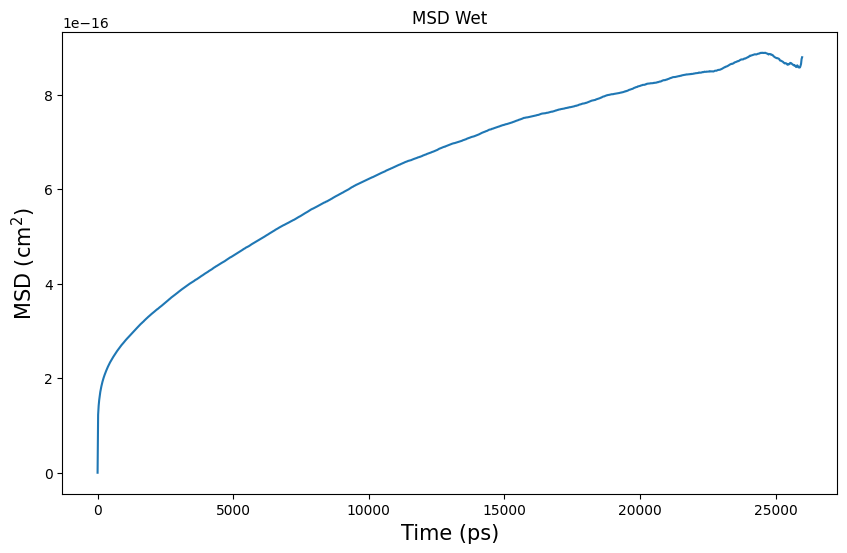

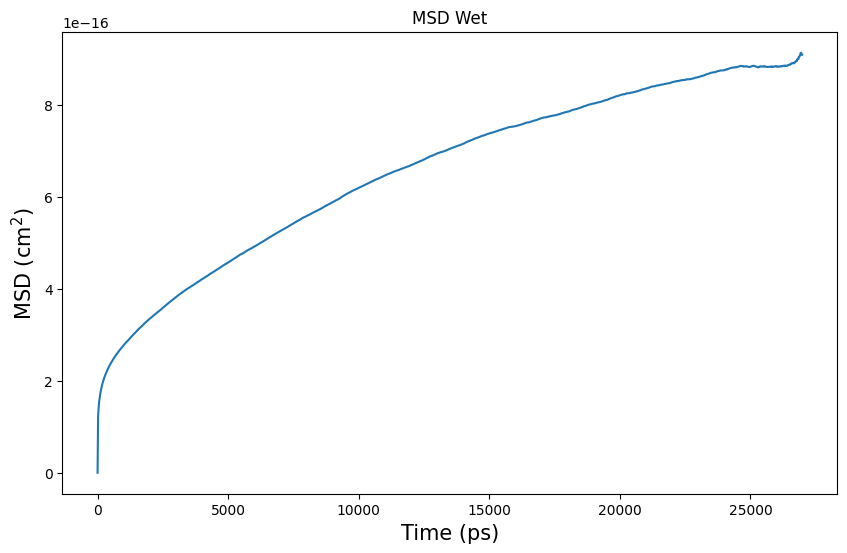

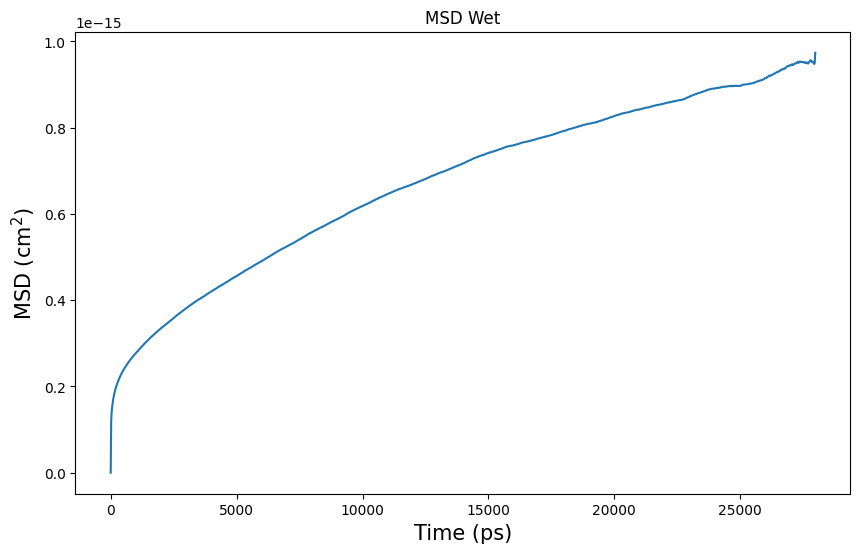

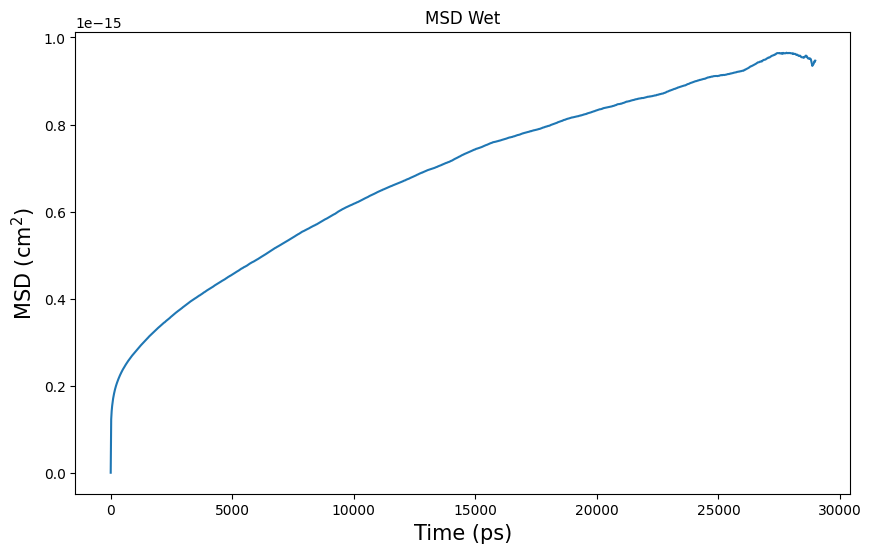

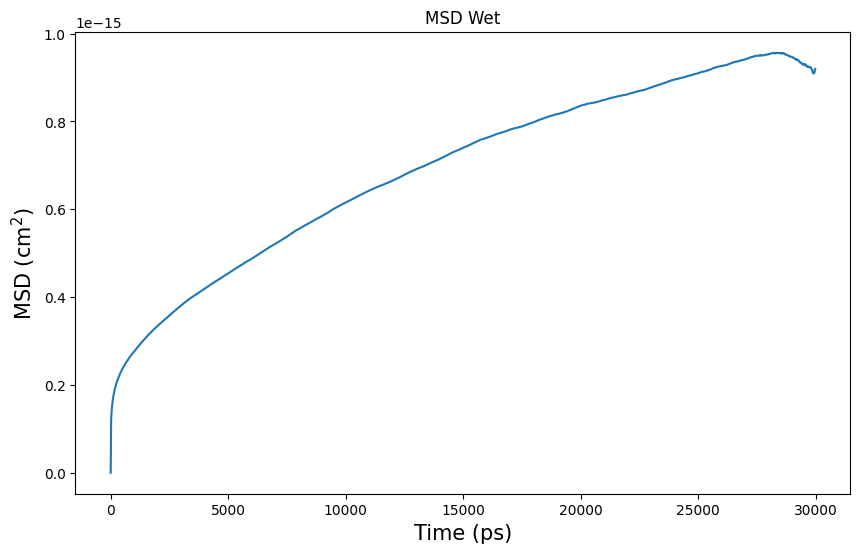

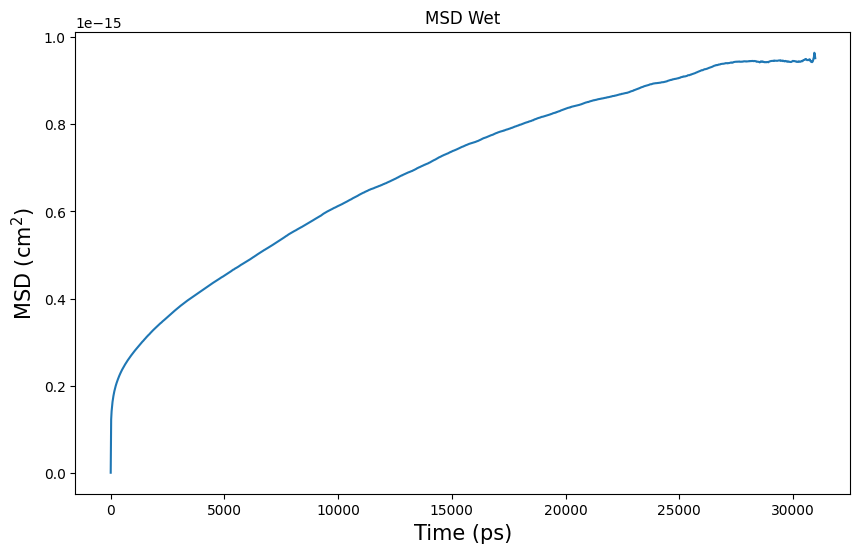

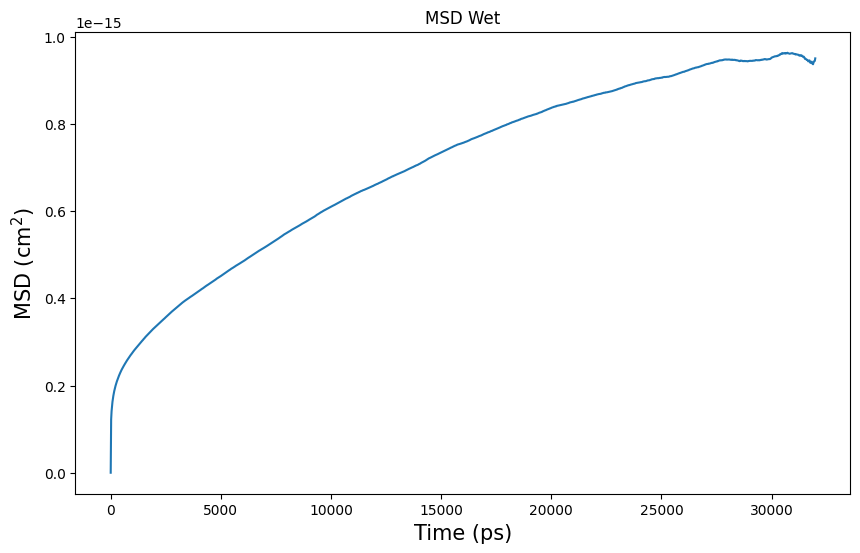

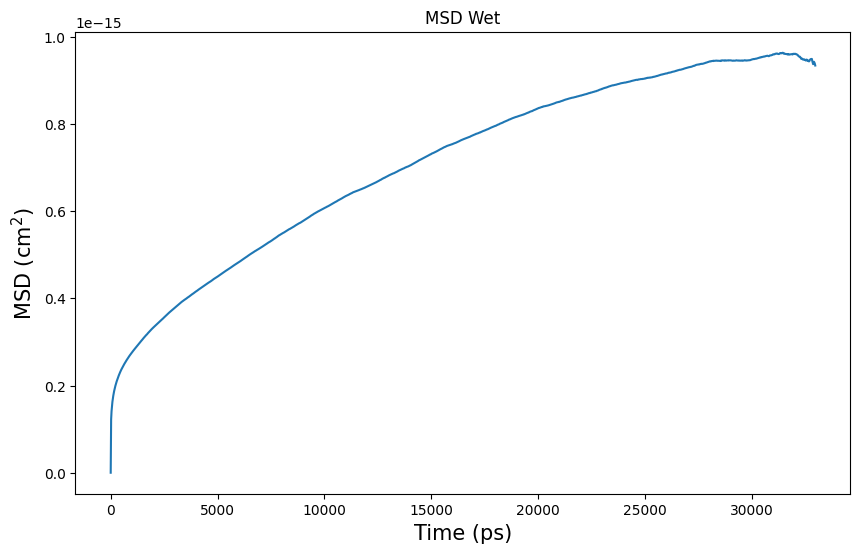

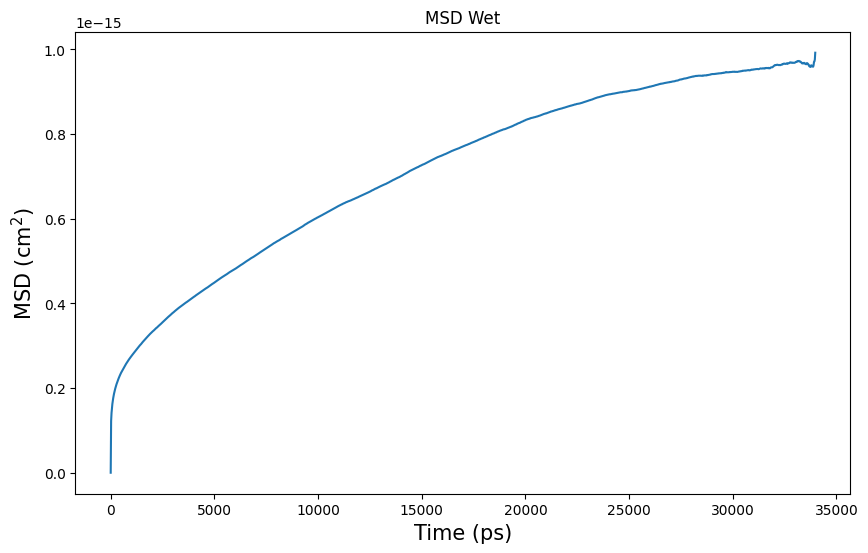

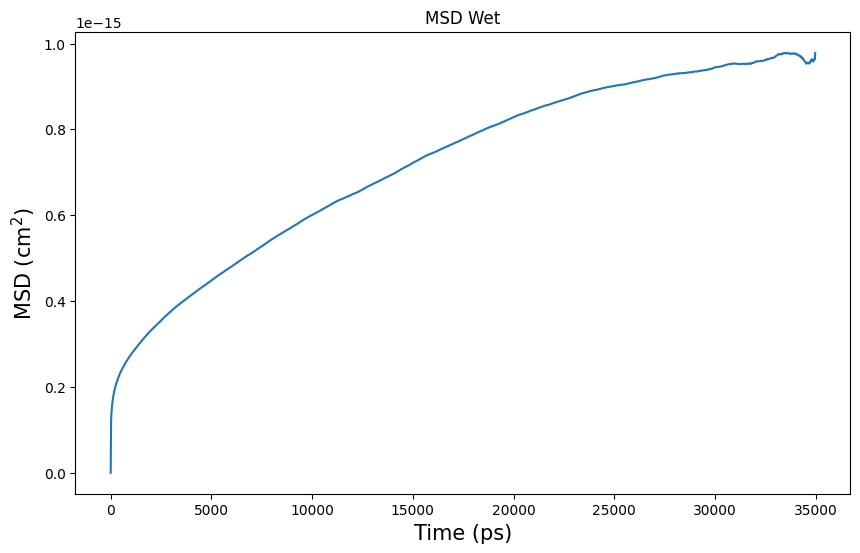

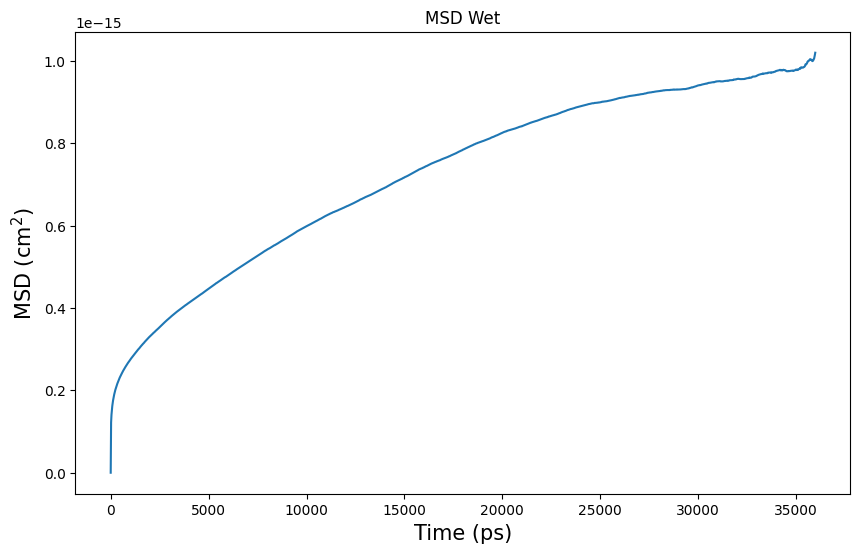

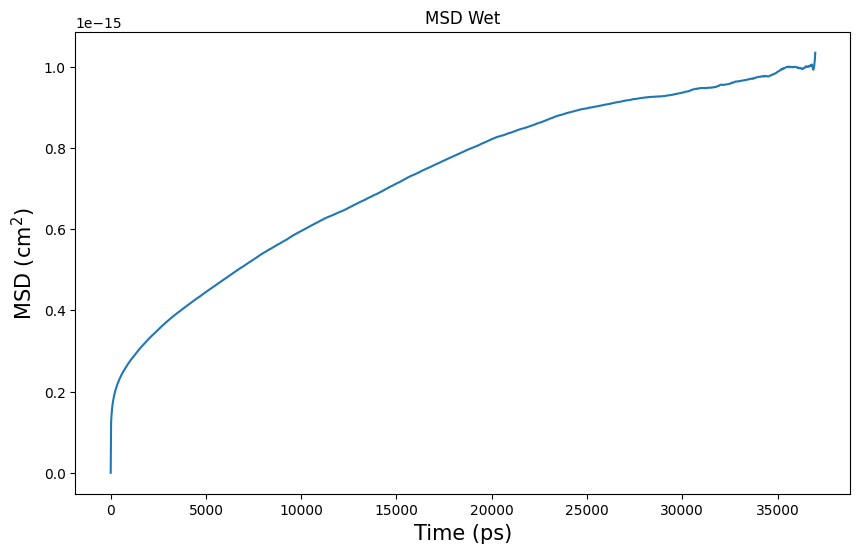

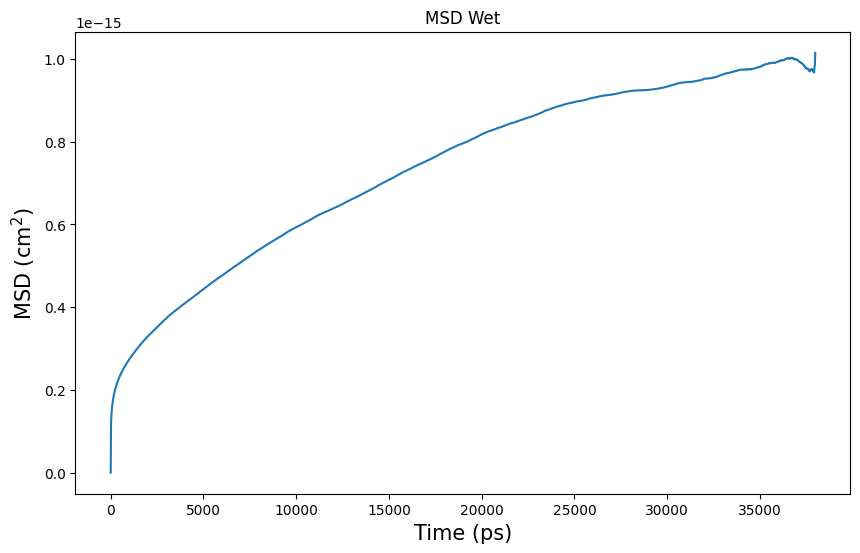

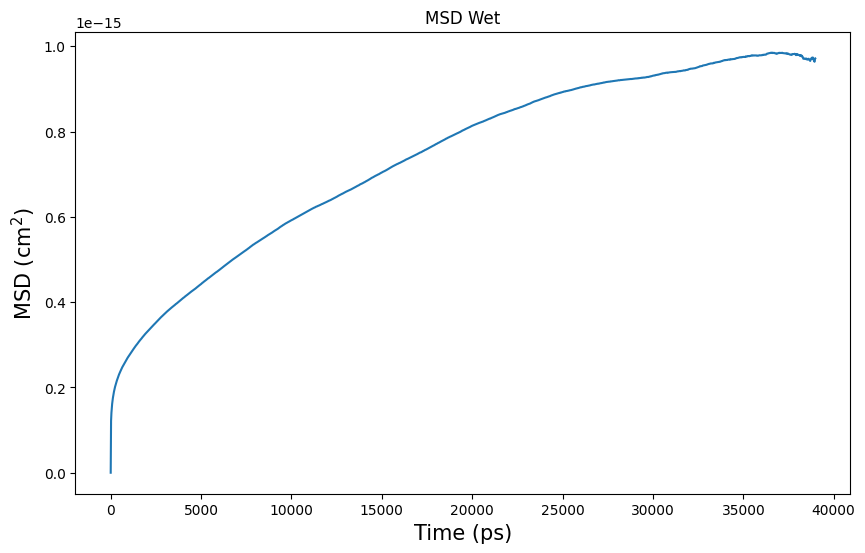

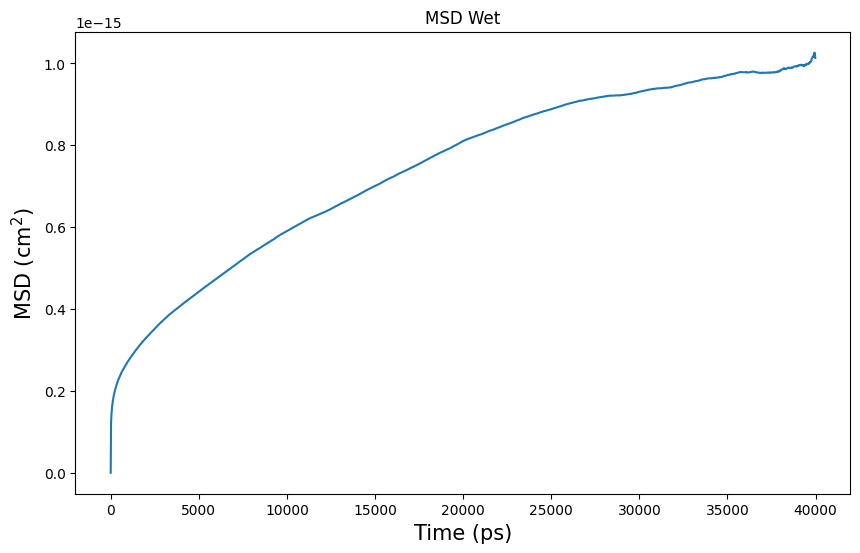

In [6]:
diffusion.msd_300k_plotter(
    msd_array=wet_msds_300k, lagtime_array=wet_lagtimes_300k, is_dry=False
)

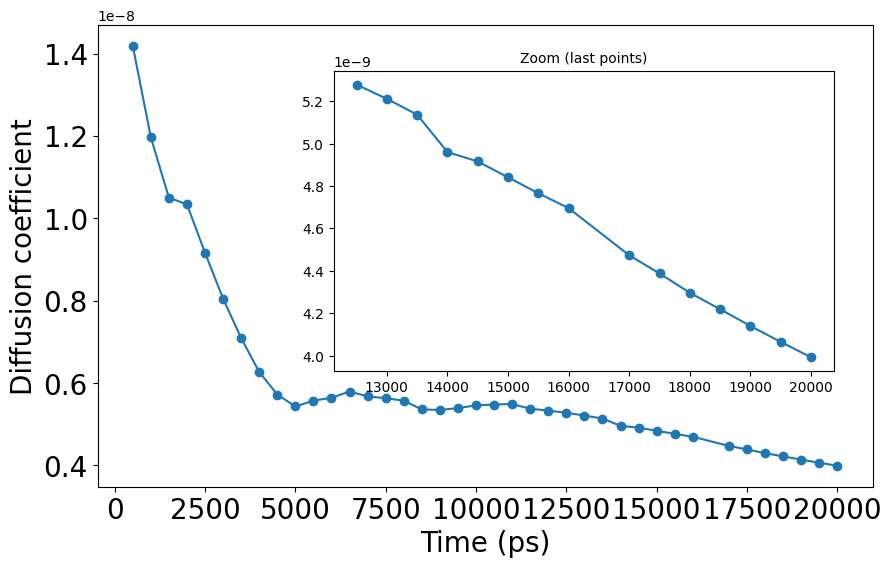

In [ ]:
wet_start_time = [
    200,
    250,
    300,
    500,
    600,
    900,
    1000,
    1000,
    1000,
    1200,
    1300,
    1500,
    1500,
    2000,
    2000,
    2000,
    2500,
    2500,
    2500,
    2500,
    2500,
    2500,
    3000,
    3000,
    3000,
    3000,
    3000,
    4000,
    4000,
    4000,
    4000,
    4000,
    5000,
    5000,
    5000,
    5000,
    5000,
    5000,
    5000,
    5000,
]

wet_end_time = [
    500,
    1000,
    1500,
    2000,
    2500,
    3000,
    3500,
    4000,
    4500,
    5000,
    5500,
    6000,
    6500,
    7000,
    7500,
    8000,
    8500,
    9000,
    9500,
    10000,
    10500,
    11000,
    11500,
    12000,
    12500,
    13000,
    13500,
    14000,
    14500,
    15000,
    15500,
    16000,
    17000,
    17500,
    18000,
    18500,
    19000,
    19500,
    20000,
]

d_wet, wet_lagtime_end = diffusion.diffusion_coefficients_300k(
    msd_array=wet_msds_300k,
    lagtime_array=wet_lagtimes_300k,
    start_array_ps=wet_start_time,
    end_array_ps=wet_end_time,
)
diffusion.plot_diff_time_300k_inset(
    diff_array=d_wet, lagtime_end_array=wet_end_time, is_dry=False
)